<a href="https://colab.research.google.com/github/Mrunal018/Principle-Component-Analysis/blob/main/EURUSD(Volume).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Internship/Copy of EURUSD_05.05.2003-30.06.2021(1).csv')

In [ ]:
data.head(10)

Local time     open     high      low    close  \
0  05.05.2003 00:00:00.000 GMT+0300  1.12354  1.13019  1.12030  1.12804   
1  06.05.2003 00:00:00.000 GMT+0300  1.12798  1.14510  1.12738  1.14368   
2  07.05.2003 00:00:00.000 GMT+0300  1.14367  1.14448  1.13275  1.13677   
3  08.05.2003 00:00:00.000 GMT+0300  1.13675  1.15092  1.13026  1.15026   
4  09.05.2003 00:00:00.000 GMT+0300  1.15002  1.15376  1.14362  1.14907   
5  10.05.2003 00:00:00.000 GMT+0300  1.14907  1.14907  1.14907  1.14907   
6  11.05.2003 00:00:00.000 GMT+0300  1.14907  1.14907  1.14907  1.14907   
7  12.05.2003 00:00:00.000 GMT+0300  1.14958  1.16244  1.14946  1.15457   
8  13.05.2003 00:00:00.000 GMT+0300  1.15427  1.15751  1.14630  1.15150   
9  14.05.2003 00:00:00.000 GMT+0300  1.15190  1.15388  1.14681  1.14970   

        volume  
0  1053162.797  
1  1061122.699  
2  1056796.590  
3  1058908.699  
4  1063989.000  
5        0.000  
6        0.000  
7  1056515.797  
8  1057731.395  
9  1053901.311

In [ ]:
data=data[data['volume']!=0] #discard volume zero data points
data.reset_index(drop=True, inplace=True)
data.isna().sum()
data.tail() # printing tail just to check how many rows are present

Local time     open     high      low    close  \
4729  24.06.2021 00:00:00.000 GMT+0300  1.19267  1.19565  1.19178  1.19322   
4730  25.06.2021 00:00:00.000 GMT+0300  1.19322  1.19754  1.19264  1.19392   
4731  28.06.2021 00:00:00.000 GMT+0300  1.19380  1.19447  1.19025  1.19260   
4732  29.06.2021 00:00:00.000 GMT+0300  1.19297  1.19334  1.18779  1.18973   
4733  30.06.2021 00:00:00.000 GMT+0300  1.18973  1.19092  1.18452  1.18589   

           volume  
4729  85152.21000  
4730  77837.64500  
4731  85154.26000  
4732  98898.57000  
4733   4301.30191

In [ ]:
# Reset the index to bring back the 'time' column
data = data.reset_index()
# Now set the 'time' column as the index
data = data.set_index(['Local time'])
data.head()

index     open     high      low    close  \
Local time                                                                    
05.05.2003 00:00:00.000 GMT+0300      0  1.12354  1.13019  1.12030  1.12804   
06.05.2003 00:00:00.000 GMT+0300      1  1.12798  1.14510  1.12738  1.14368   
07.05.2003 00:00:00.000 GMT+0300      2  1.14367  1.14448  1.13275  1.13677   
08.05.2003 00:00:00.000 GMT+0300      3  1.13675  1.15092  1.13026  1.15026   
09.05.2003 00:00:00.000 GMT+0300      4  1.15002  1.15376  1.14362  1.14907   

                                       volume  
Local time                                     
05.05.2003 00:00:00.000 GMT+0300  1053162.797  
06.05.2003 00:00:00.000 GMT+0300  1061122.699  
07.05.2003 00:00:00.000 GMT+0300  1056796.590  
08.05.2003 00:00:00.000 GMT+0300  1058908.699  
09.05.2003 00:00:00.000 GMT+0300  1063989.000

# **Plotting Time Series**

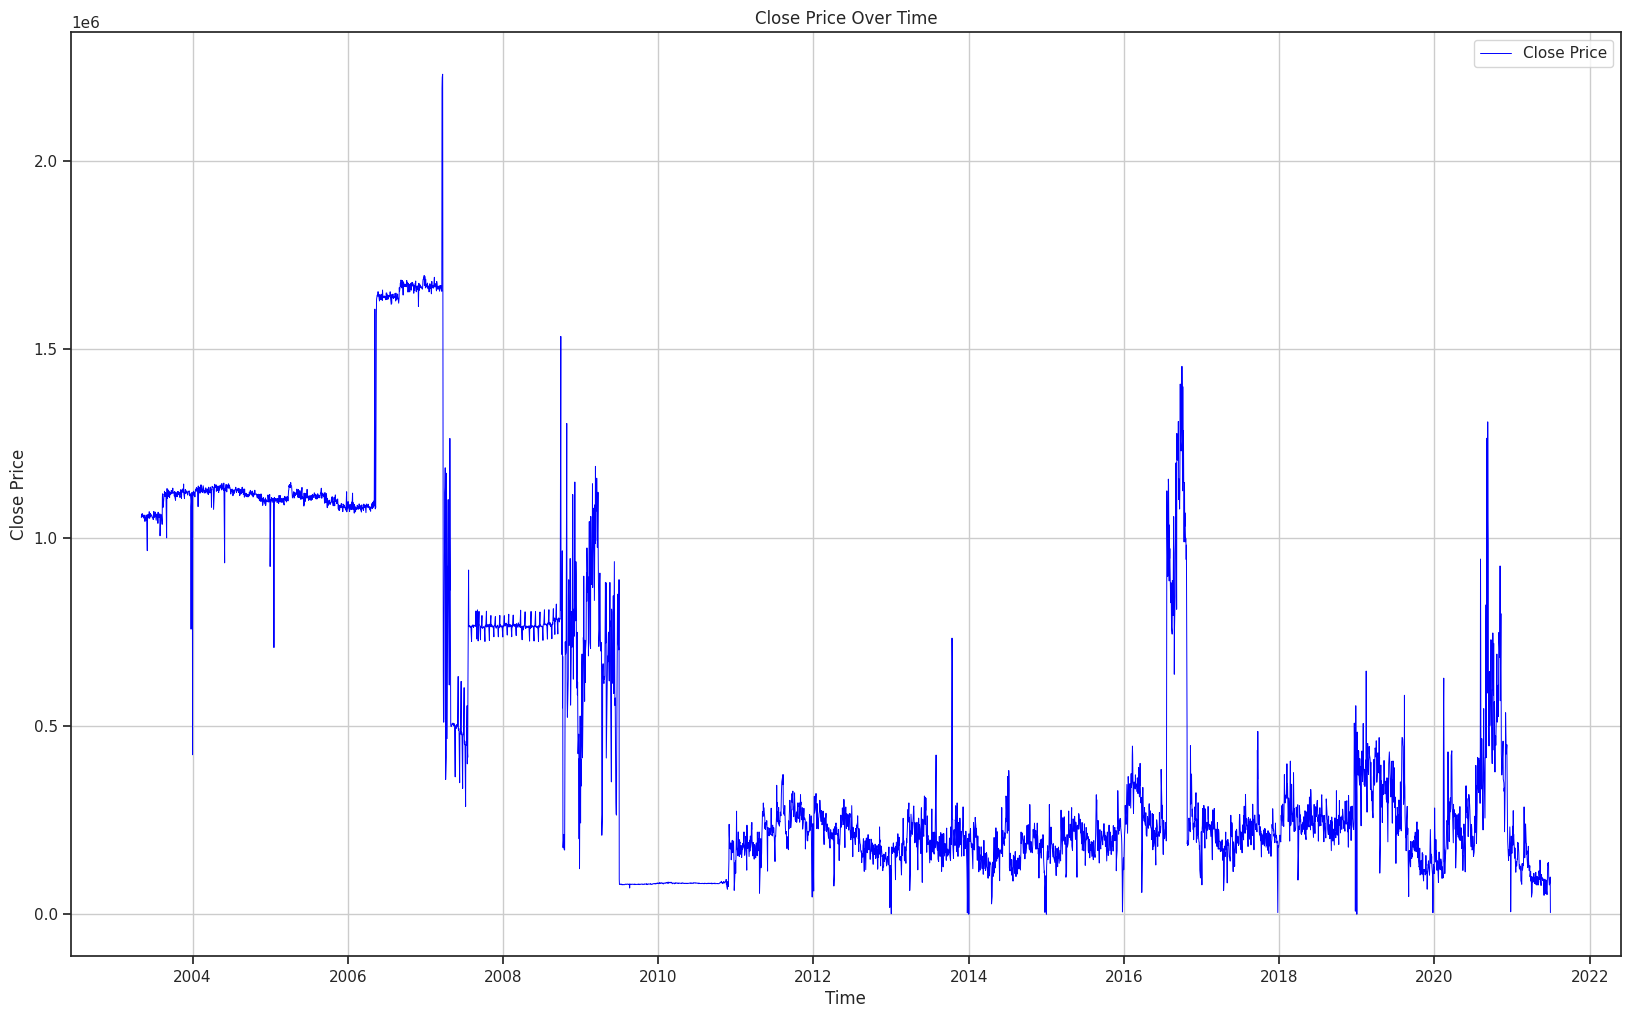

In [ ]:
# Convert the index to a datetime object
data.index = pd.to_datetime(data.index, format='%d.%m.%Y %H:%M:%S.%f GMT%z', utc=True) # Set utc=True to handle timezone-aware datetimes

# Plot
plt.figure(figsize=(20, 12))
plt.plot(data.index, data['volume'], label='Close Price', color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# **Seasonal decomposition : monthly and dayily**

plot shows Daily seasonality present i.e. after 7 days the pattern is recurring.

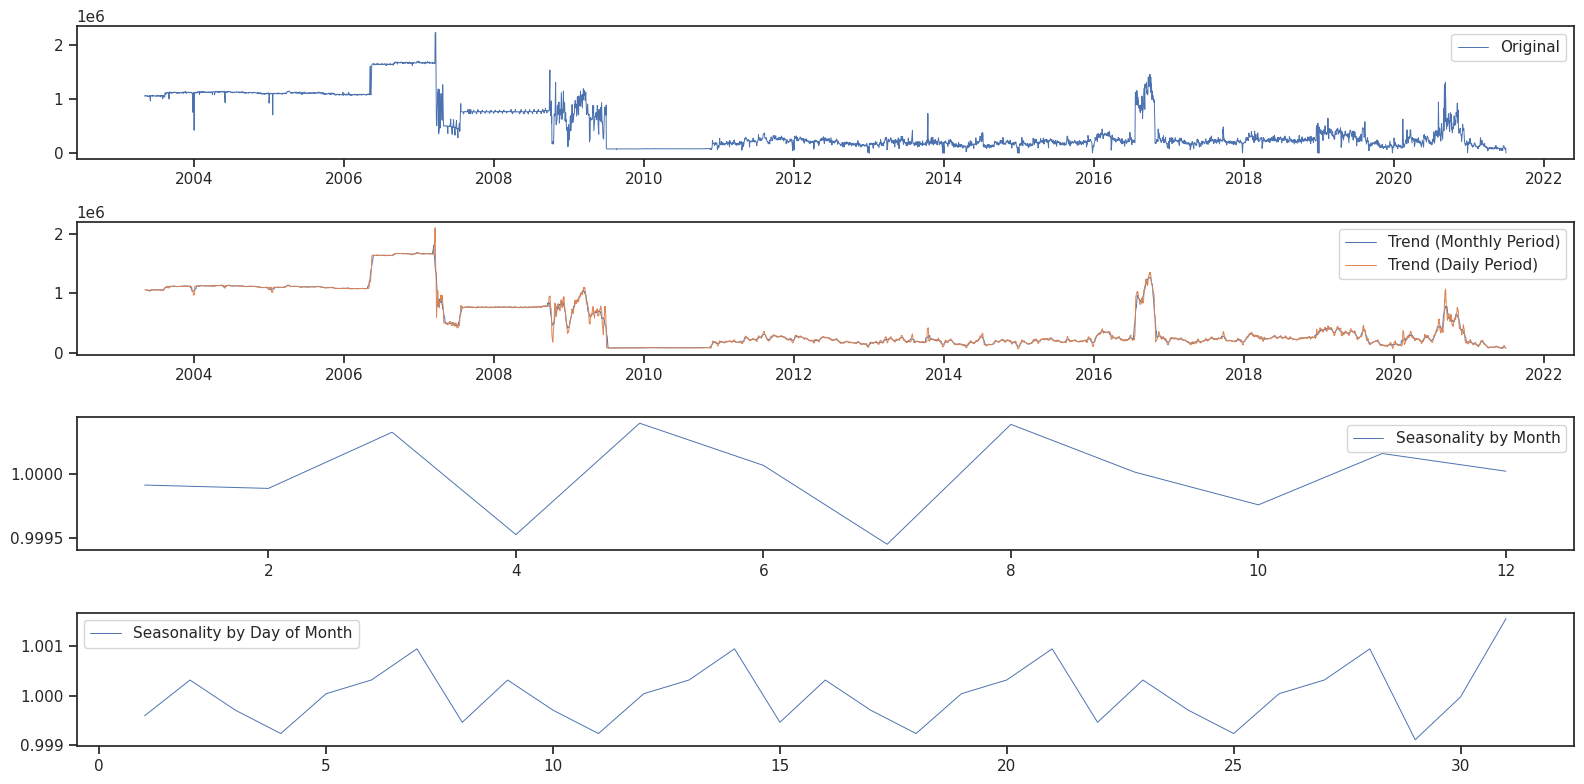

In [ ]:
# Seasonal decomposition
result_monthly = seasonal_decompose(data['volume'], model='multiplicative', period=15)  # Monthly period
result_daily = seasonal_decompose(data['volume'], model='multiplicative', period=5)  # Daily period

# Plot the results
plt.figure(figsize=(16, 8))

# Plot original data
plt.subplot(411)
plt.plot(data['volume'], label='Original')  # Plot the 'close' column
plt.legend(loc='best')

# Plot trend component
plt.subplot(412)
plt.plot(result_monthly.trend, label='Trend (Monthly Period)')
plt.plot(result_daily.trend, label='Trend (Daily Period)')
plt.legend(loc='best')

# Plot seasonal component by months
seasonal_monthly = result_monthly.seasonal.groupby(result_monthly.seasonal.index.month).mean()
plt.subplot(413)
plt.plot(seasonal_monthly, label='Seasonality by Month')
plt.legend(loc='best')

# Plot seasonal component by days of the month
seasonal_daily = result_daily.seasonal.groupby(result_daily.seasonal.index.day).mean()
plt.subplot(414)
plt.plot(seasonal_daily, label='Seasonality by Day of Month')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


# **Stationary Window Highlited**

We can observe the Stationary window between year 2012 and 2014

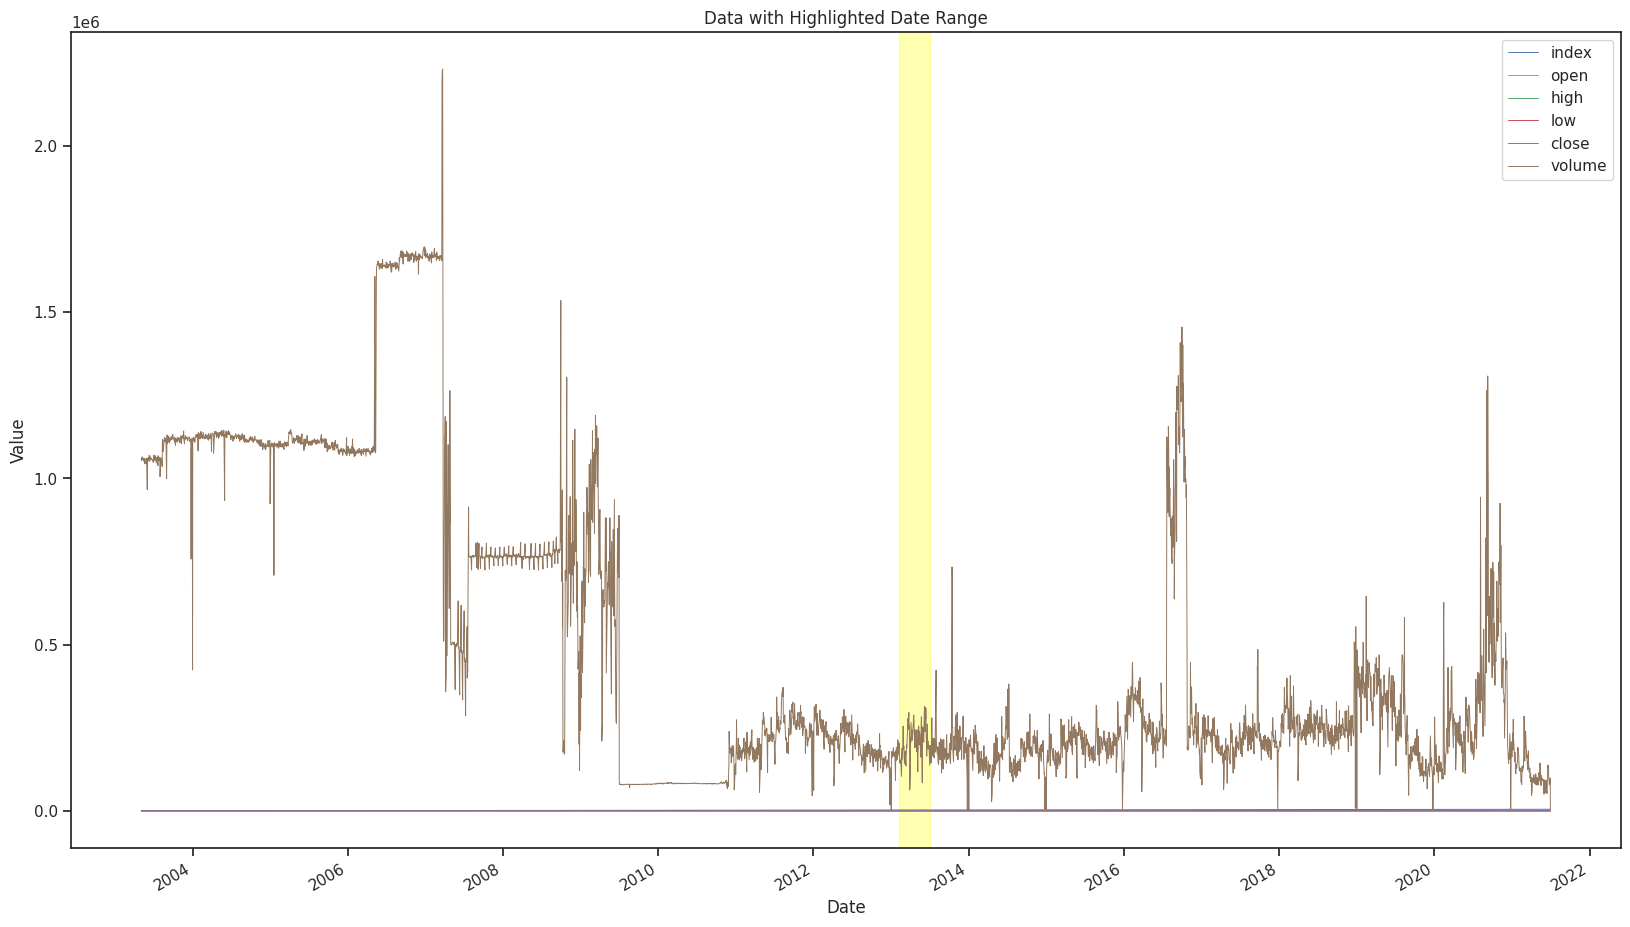

In [ ]:
import matplotlib.pyplot as plt

# Define the start and end date for the highlight
start_date = '2013-02-05'
end_date = '2013-06-30'

# Create a plot
fig, ax = plt.subplots(figsize=(20, 12))

# Plot the data
data.plot(ax=ax)

# Highlight the date range
ax.axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color='yellow', alpha=0.3)

# Customize plot
plt.title('Data with Highlighted Date Range')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


In [ ]:
data.describe()

index         open         high          low        close  \
count  4734.000000  4734.000000  4734.000000  4734.000000  4734.000000   
mean   2366.500000     1.255723     1.261070     1.250208     1.255760   
std    1366.732417     0.120047     0.120823     0.119110     0.120018   
min       0.000000     1.038960     1.041820     1.034050     1.038980   
25%    1183.250000     1.150038     1.154622     1.145112     1.150192   
50%    2366.500000     1.247380     1.253155     1.240865     1.247120   
75%    3549.750000     1.340537     1.345515     1.334910     1.340475   
max    4733.000000     1.599500     1.604030     1.586560     1.599120   

             volume  
count  4.734000e+03  
mean   5.052799e+05  
std    4.502866e+05  
min    1.500000e+00  
25%    1.810935e+05  
50%    2.557216e+05  
75%    8.036936e+05  
max    2.230654e+06

# **Stationary window Dataset**

                           index     open     high      low    close  \
Local time                                                             
2013-02-05 22:00:00+00:00   2547  1.35840  1.35968  1.34958  1.35234   
2013-02-06 22:00:00+00:00   2548  1.35236  1.35775  1.33709  1.33977   
2013-02-07 22:00:00+00:00   2549  1.33979  1.34294  1.33540  1.33665   
2013-02-10 22:00:00+00:00   2550  1.33687  1.34280  1.33575  1.34064   
2013-02-11 22:00:00+00:00   2551  1.34064  1.34766  1.33645  1.34542   
...                          ...      ...      ...      ...      ...   
2013-06-23 21:00:00+00:00   2645  1.30919  1.31441  1.30595  1.31206   
2013-06-24 21:00:00+00:00   2646  1.31208  1.31514  1.30653  1.30815   
2013-06-25 21:00:00+00:00   2647  1.30815  1.30875  1.29850  1.30126   
2013-06-26 21:00:00+00:00   2648  1.30126  1.30553  1.30004  1.30390   
2013-06-27 21:00:00+00:00   2649  1.30390  1.31036  1.29915  1.30099   

                                volume  
Local time            

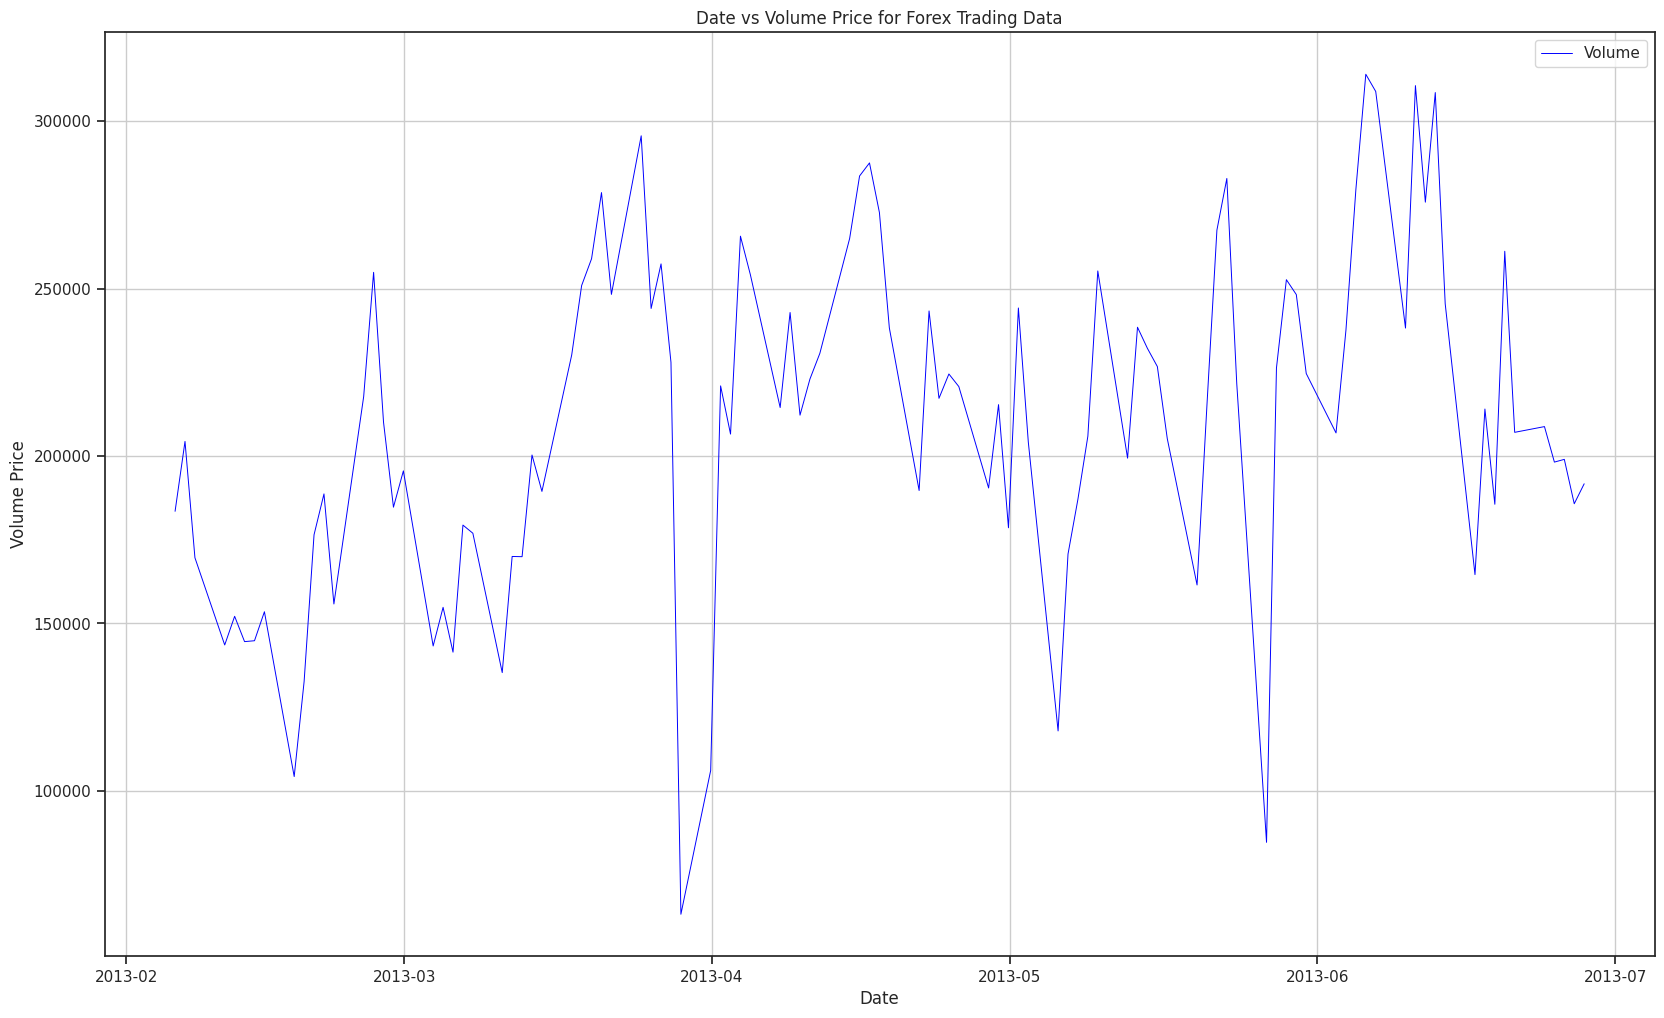

In [ ]:
start_date = pd.to_datetime('2013-02-05').tz_localize('UTC') # Make tz-aware
end_date = pd.to_datetime('2013-06-30').tz_localize('UTC') # Make tz-aware

# Now filter the DataFrame
data2 = data[(data.index >= start_date) & (data.index <= end_date)]
print(data2)

plt.figure(figsize=(20, 12))
plt.plot(data2.index, data2['volume'], label='Volume', color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Volume Price')
plt.title('Date vs Volume Price for Forex Trading Data')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

**ADF Test**

In [ ]:
print(data2)
result = adfuller(data2['close'])
p_value = result[1]
print(result)
print("Test Statistic:", result[0])
print("P-value:", result[1])
print("Number of Lags:", result[2])
print("Number of Observations:", result[3])
print("Critical Values:", result[4])
if p_value < 0.05:
    print("Reject the null hypothesis. The data2 is stationary.")
else:
    print("Fail to reject the null hypothesis. The data2 is non-stationary.")


                           index     open     high      low    close  \
Local time                                                             
2013-02-05 22:00:00+00:00   2547  1.35840  1.35968  1.34958  1.35234   
2013-02-06 22:00:00+00:00   2548  1.35236  1.35775  1.33709  1.33977   
2013-02-07 22:00:00+00:00   2549  1.33979  1.34294  1.33540  1.33665   
2013-02-10 22:00:00+00:00   2550  1.33687  1.34280  1.33575  1.34064   
2013-02-11 22:00:00+00:00   2551  1.34064  1.34766  1.33645  1.34542   
...                          ...      ...      ...      ...      ...   
2013-06-23 21:00:00+00:00   2645  1.30919  1.31441  1.30595  1.31206   
2013-06-24 21:00:00+00:00   2646  1.31208  1.31514  1.30653  1.30815   
2013-06-25 21:00:00+00:00   2647  1.30815  1.30875  1.29850  1.30126   
2013-06-26 21:00:00+00:00   2648  1.30126  1.30553  1.30004  1.30390   
2013-06-27 21:00:00+00:00   2649  1.30390  1.31036  1.29915  1.30099   

                                volume  
Local time            

**Seasonality**

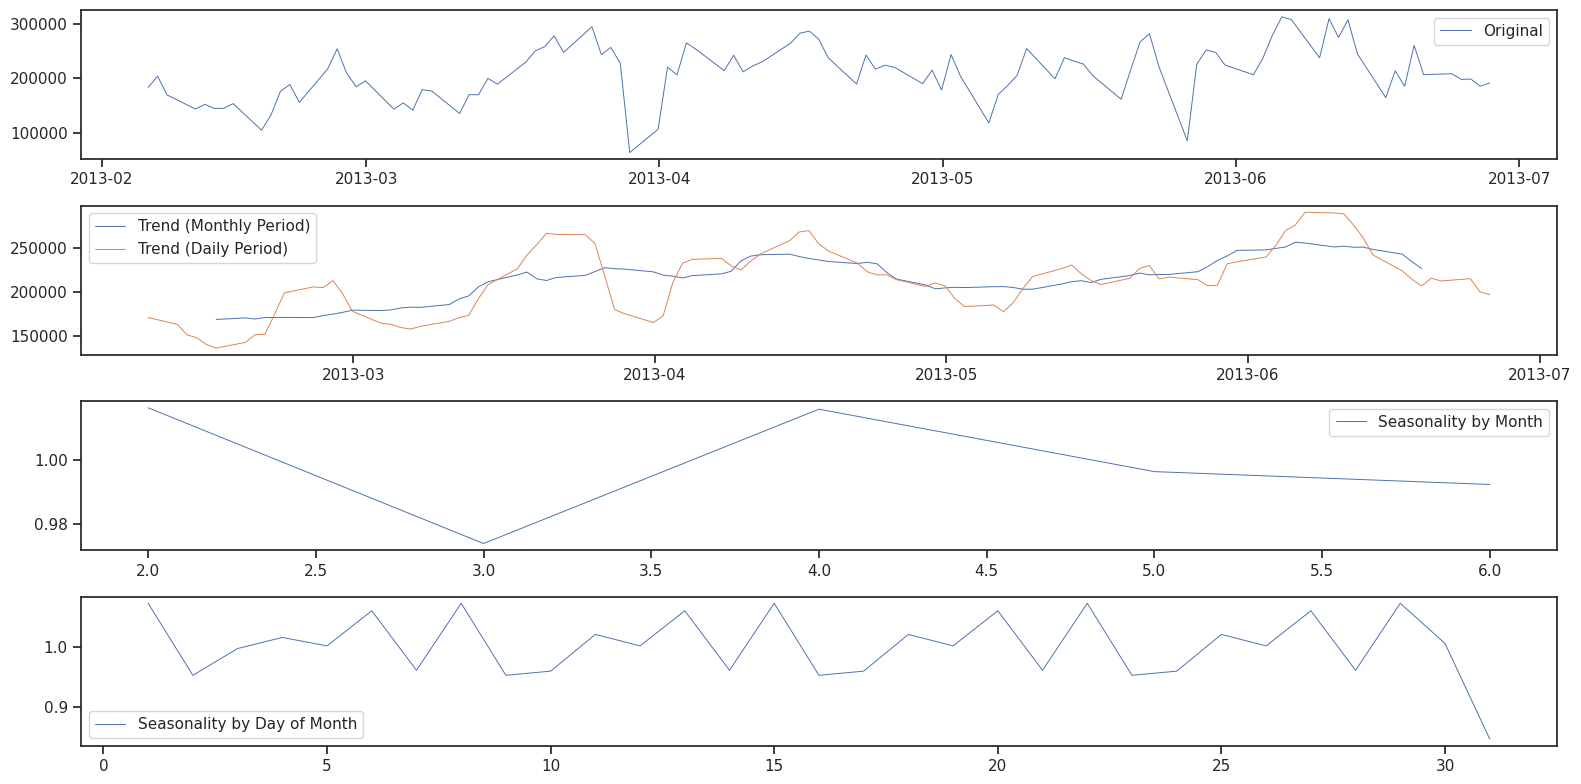

In [ ]:
# Seasonal decomposition
result_monthly = seasonal_decompose(data2['volume'], model='multiplicative', period=15)  # Monthly period
result_daily = seasonal_decompose(data2['volume'], model='multiplicative', period=5)  # Daily period

# Plot the results
plt.figure(figsize=(16, 8))

# Plot original data2
plt.subplot(411)
plt.plot(data2['volume'], label='Original')  # Plot the 'close' column
plt.legend(loc='best')

# Plot trend component
plt.subplot(412)
plt.plot(result_monthly.trend, label='Trend (Monthly Period)')
plt.plot(result_daily.trend, label='Trend (Daily Period)')
plt.legend(loc='best')

# Plot seasonal component by months
seasonal_monthly = result_monthly.seasonal.groupby(result_monthly.seasonal.index.month).mean()
plt.subplot(413)
plt.plot(seasonal_monthly, label='Seasonality by Month')
plt.legend(loc='best')

# Plot seasonal component by days of the month
seasonal_daily = result_daily.seasonal.groupby(result_daily.seasonal.index.day).mean()
plt.subplot(414)
plt.plot(seasonal_daily, label='Seasonality by Day of Month')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


**Stationarity using local, global mean and variability**

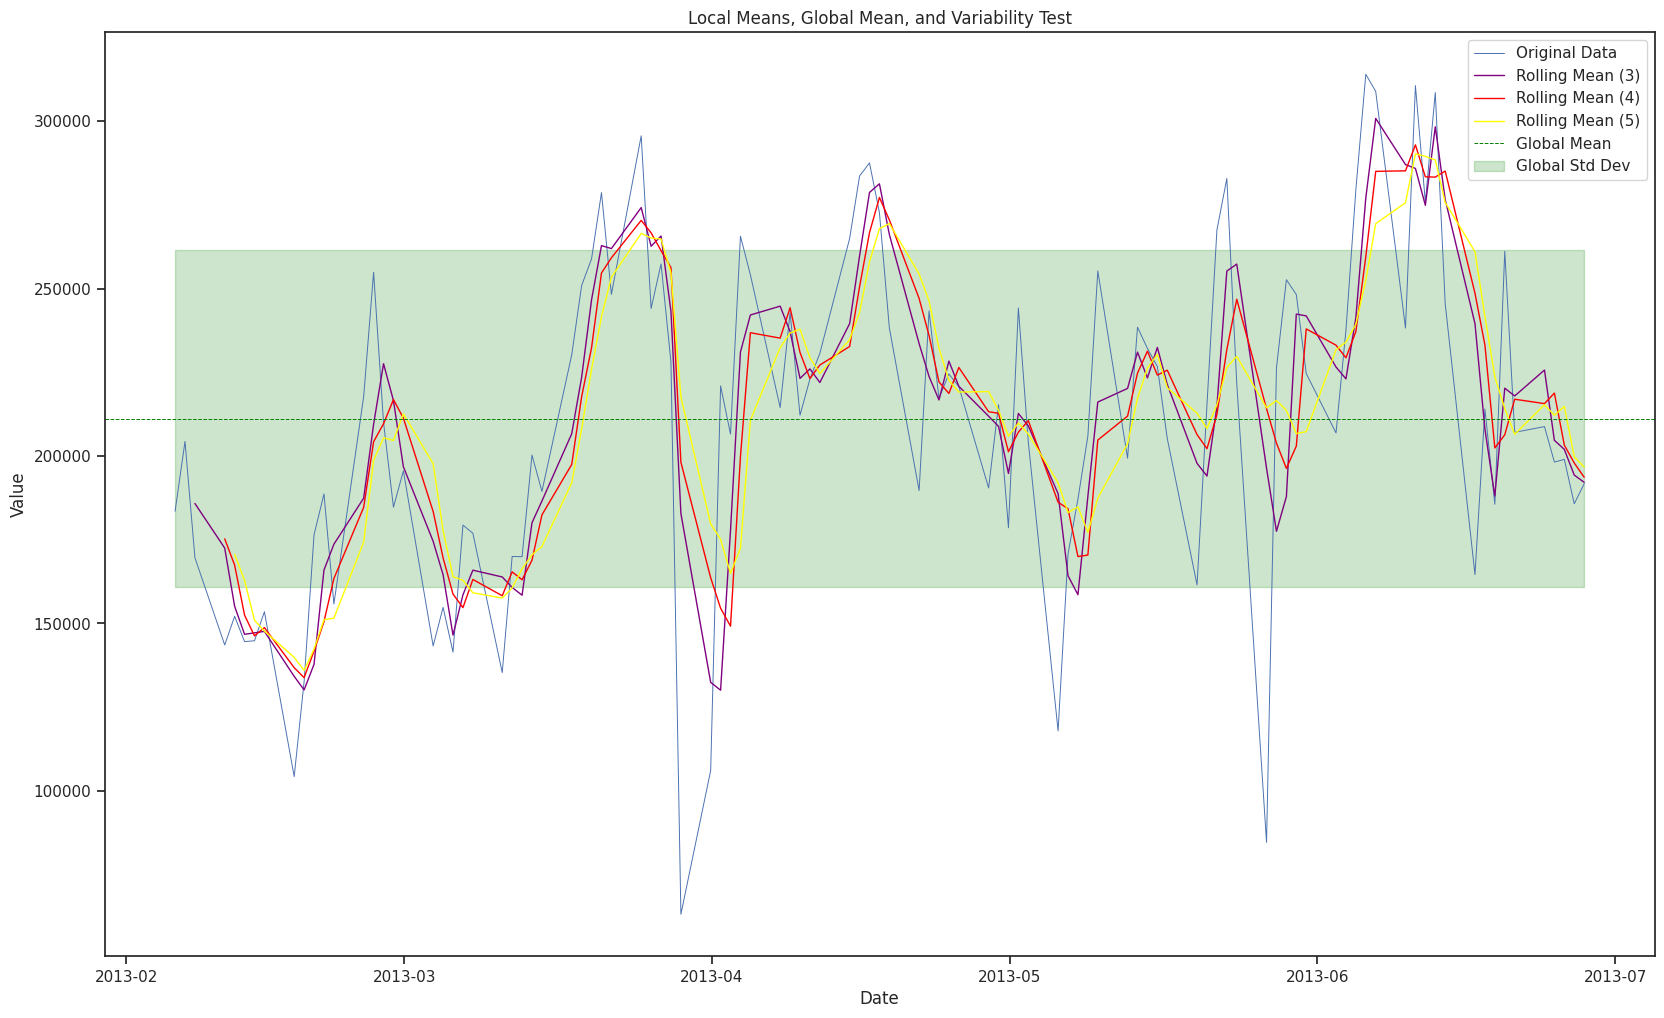

In [ ]:
# Adjusted rolling window sizes
rolling_windows = [3, 4, 5]
colors = ['purple', 'red', 'yellow']

# Plotting local means for different rolling window sizes
plt.figure(figsize=(20, 12))
plt.plot(data2.index, data2['volume'], label='Original Data')

for i, window in enumerate(rolling_windows):
    rolling_mean = data2['volume'].rolling(window=window).mean()
    plt.plot(rolling_mean, label=f'Rolling Mean ({window})', linewidth=1, color=colors[i])

global_mean = data2['volume'].mean()
global_std = data2['volume'].std()
plt.axhline(global_mean, color='green', linestyle='--', label='Global Mean')
plt.fill_between(data2.index, global_mean - global_std, global_mean + global_std, color='green', alpha=0.2, label='Global Std Dev')

plt.title('Local Means, Global Mean, and Variability Test')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


# **Comparison between additive and multiplicative model**

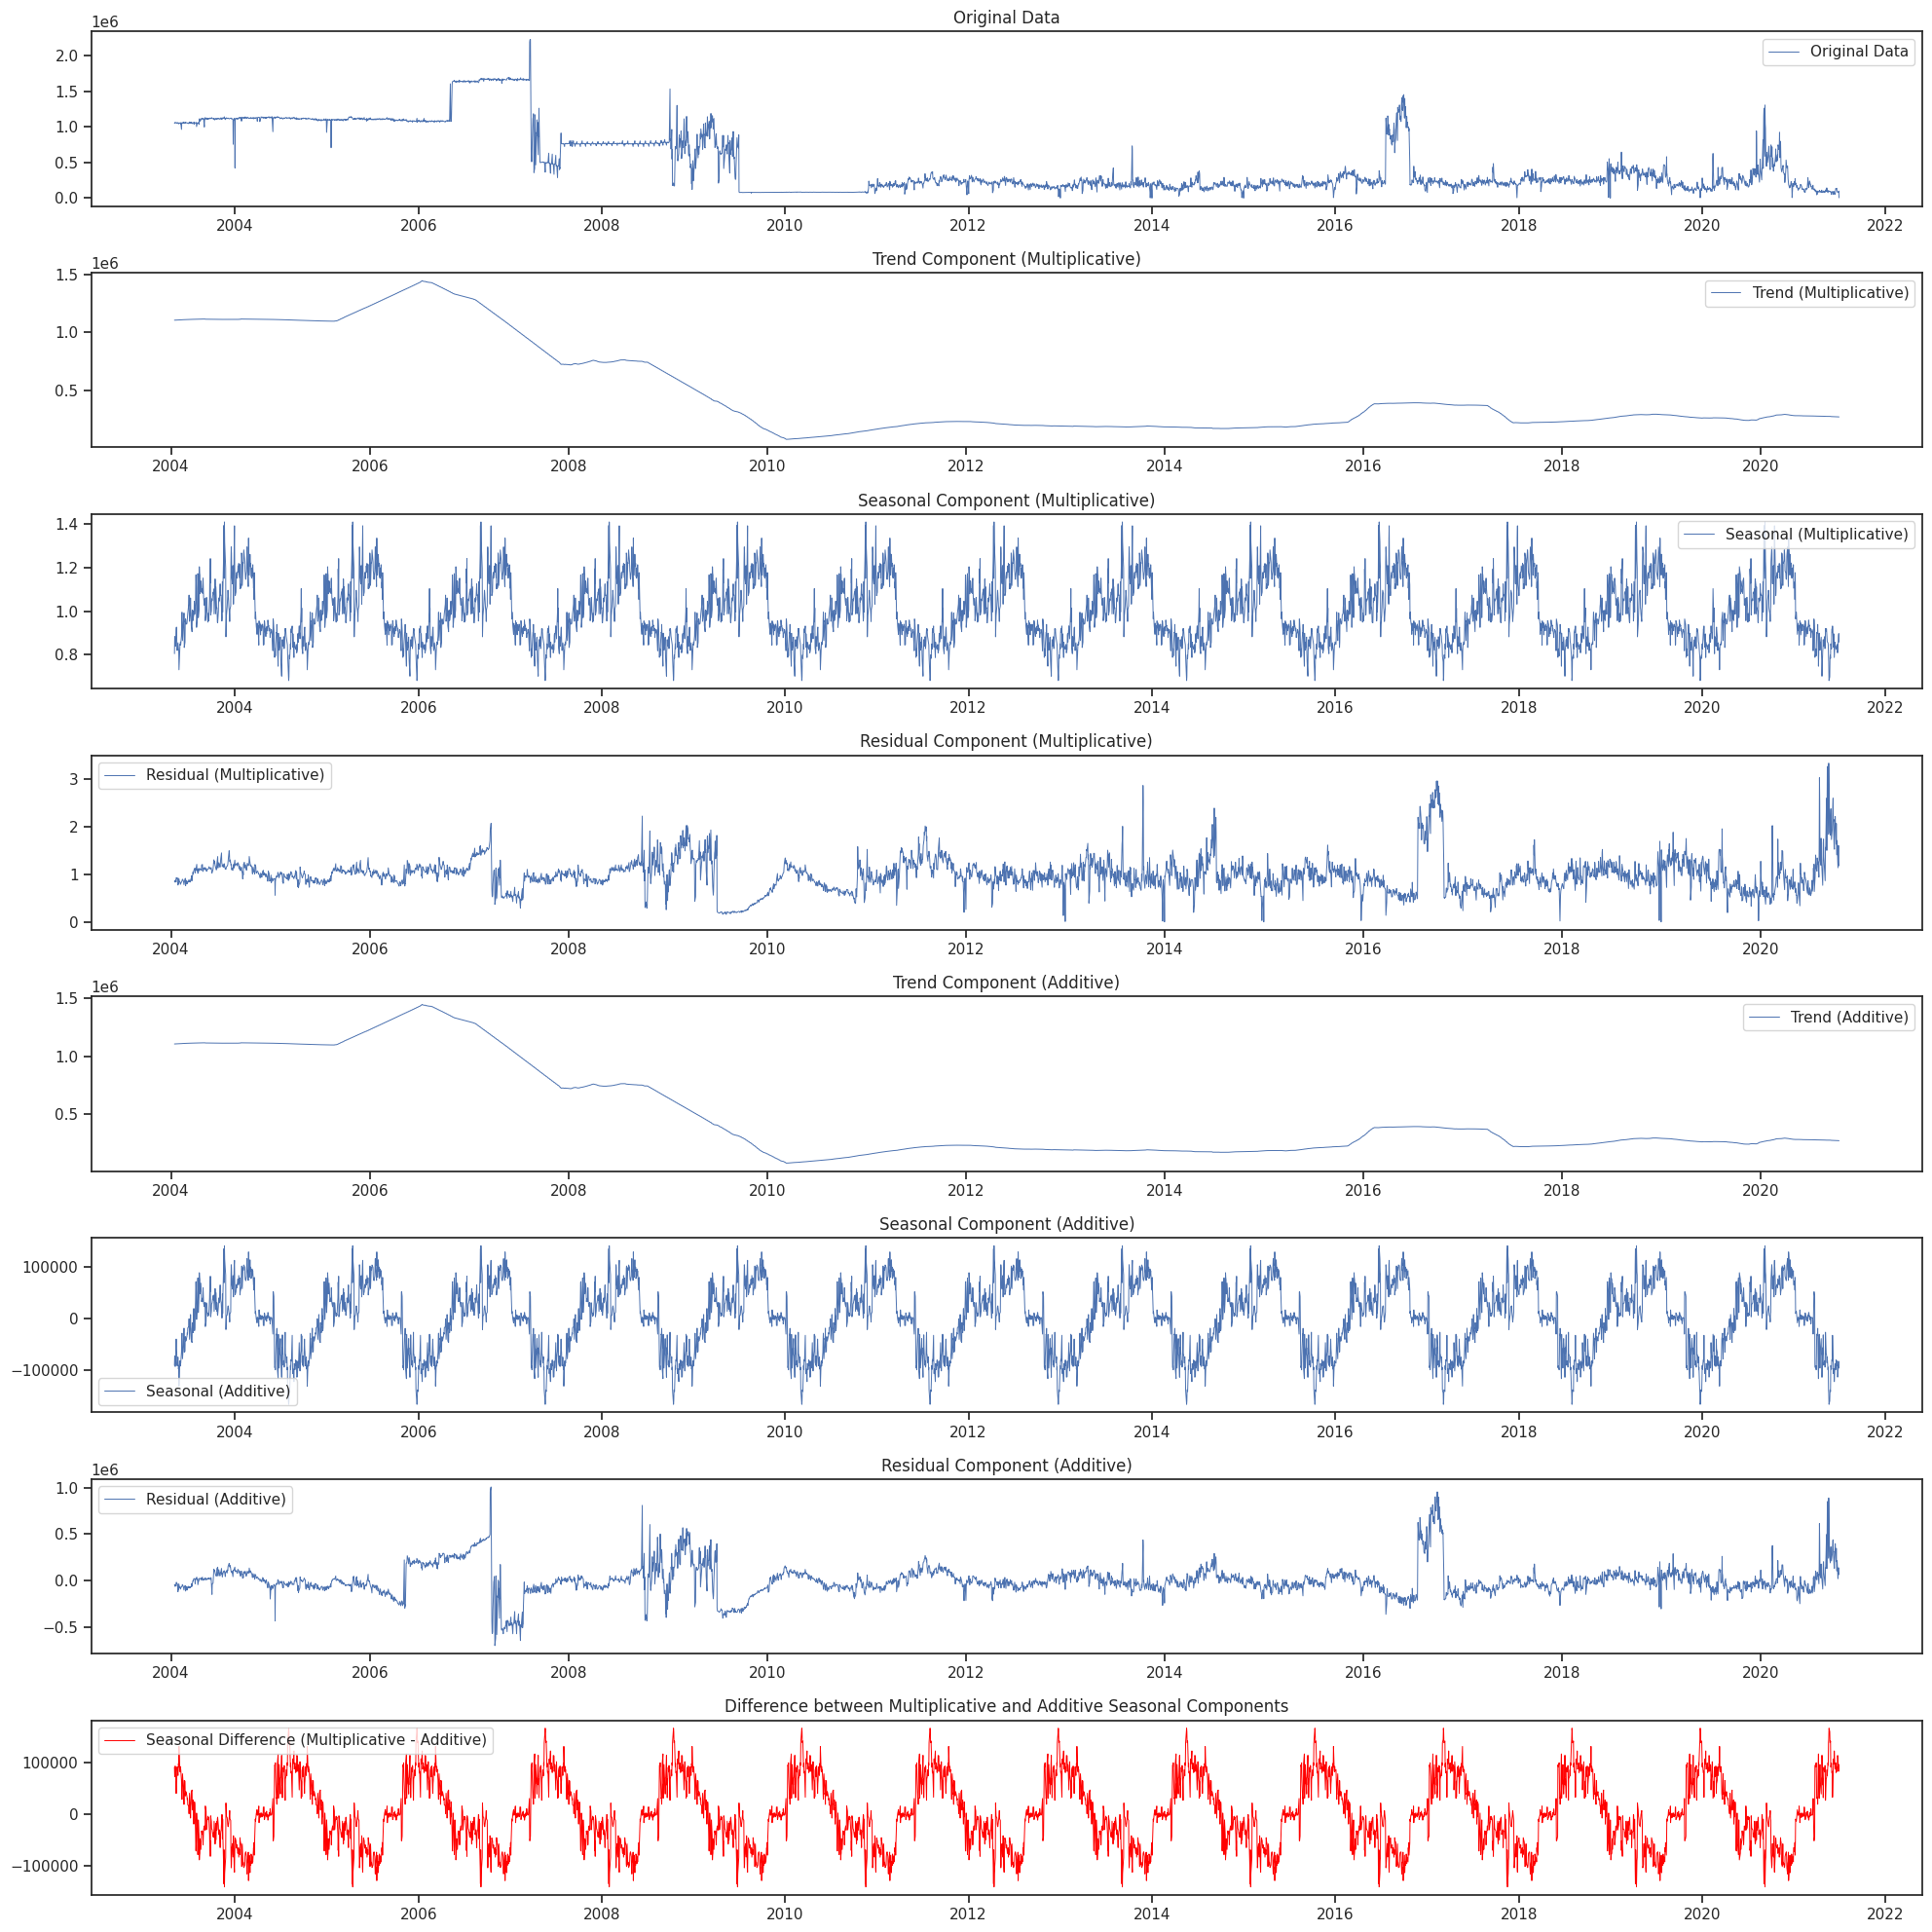

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition using multiplicative model
result_multiplicative = seasonal_decompose(data['volume'], model='multiplicative', period=365)

# Perform seasonal decomposition using additive model
result_additive = seasonal_decompose(data['volume'], model='additive', period=365)

# Plot the results in detail
plt.figure(figsize=(20, 20))

# Multiplicative Model Plots
# Plot original data
plt.subplot(8, 1, 1)
plt.plot(data['volume'], label='Original Data')
plt.title('Original Data')
plt.legend(loc='best')

# Plot trend component (multiplicative)
plt.subplot(8, 1, 2)
plt.plot(result_multiplicative.trend, label='Trend (Multiplicative)')
plt.title('Trend Component (Multiplicative)')
plt.legend(loc='best')

# Plot seasonal component (multiplicative)
plt.subplot(8, 1, 3)
plt.plot(result_multiplicative.seasonal, label='Seasonal (Multiplicative)')
plt.title('Seasonal Component (Multiplicative)')
plt.legend(loc='best')

# Plot residual component (multiplicative)
plt.subplot(8, 1, 4)
plt.plot(result_multiplicative.resid, label='Residual (Multiplicative)')
plt.title('Residual Component (Multiplicative)')
plt.legend(loc='best')

# Additive Model Plots
# Plot trend component (additive)
plt.subplot(8, 1, 5)
plt.plot(result_additive.trend, label='Trend (Additive)')
plt.title('Trend Component (Additive)')
plt.legend(loc='best')

# Plot seasonal component (additive)
plt.subplot(8, 1, 6)
plt.plot(result_additive.seasonal, label='Seasonal (Additive)')
plt.title('Seasonal Component (Additive)')
plt.legend(loc='best')

# Plot residual component (additive)
plt.subplot(8, 1, 7)
plt.plot(result_additive.resid, label='Residual (Additive)')
plt.title('Residual Component (Additive)')
plt.legend(loc='best')

# Plot differences between the two models
plt.subplot(8, 1, 8)
plt.plot(result_multiplicative.seasonal - result_additive.seasonal, label='Seasonal Difference (Multiplicative - Additive)', color='red')
plt.title('Difference between Multiplicative and Additive Seasonal Components')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


**Standard deviation**

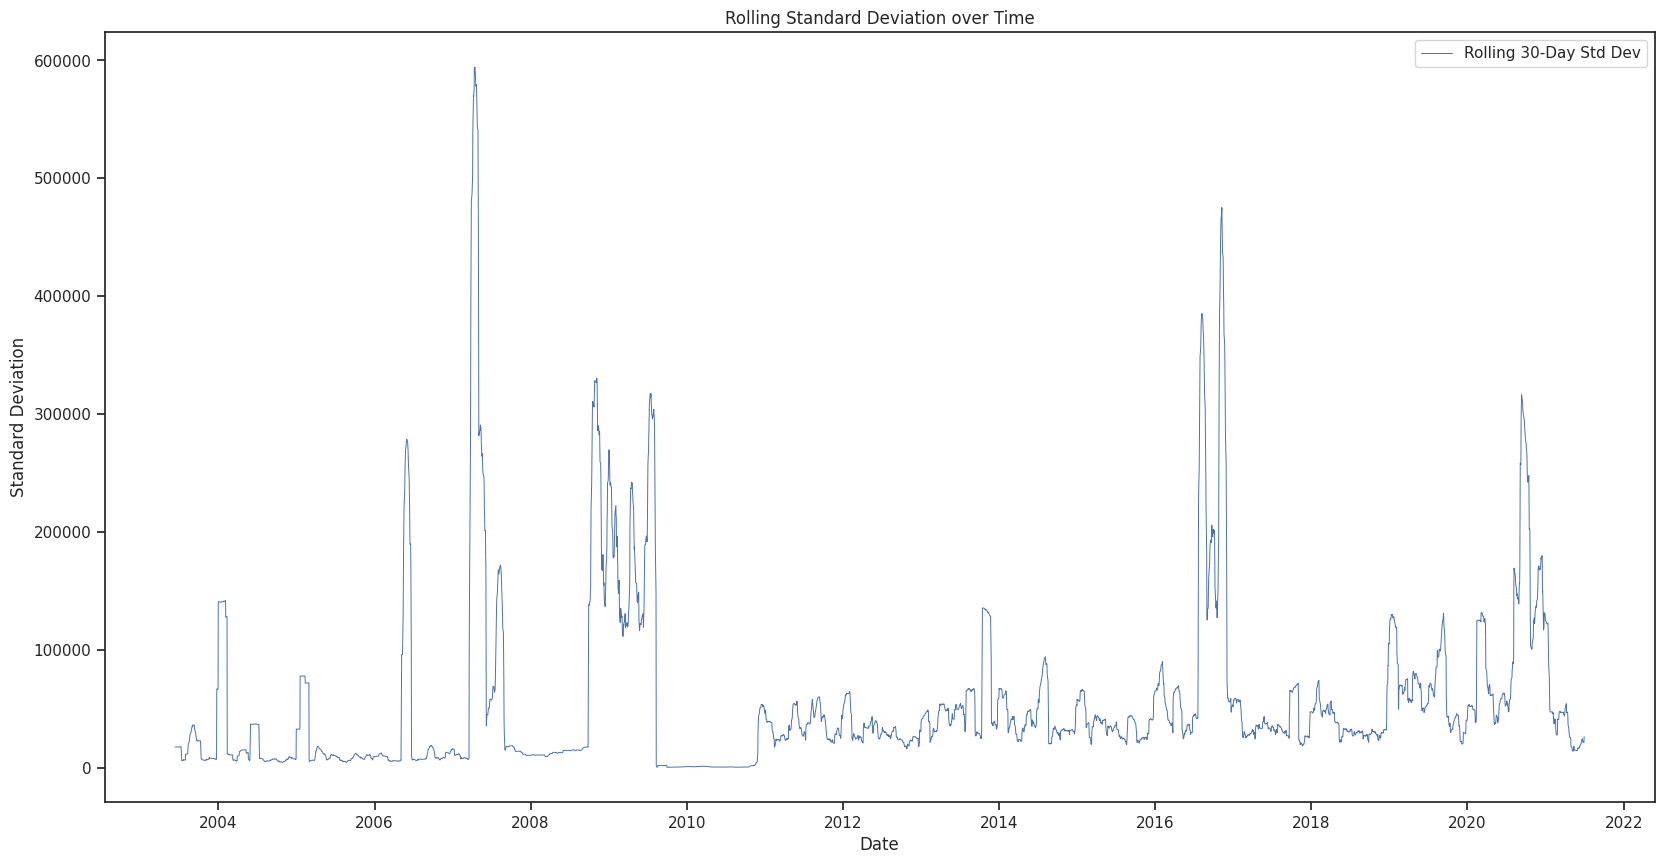

In [ ]:
window = 30
rolling_std = data['volume'].rolling(window=window).std()

plt.figure(figsize=(20, 10))
# Plot rolling standard deviation
plt.plot(data.index, rolling_std, label=f'Rolling {window}-Day Std Dev')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.title('Rolling Standard Deviation over Time')
plt.legend()
plt.show()

**OUtliers and removal**

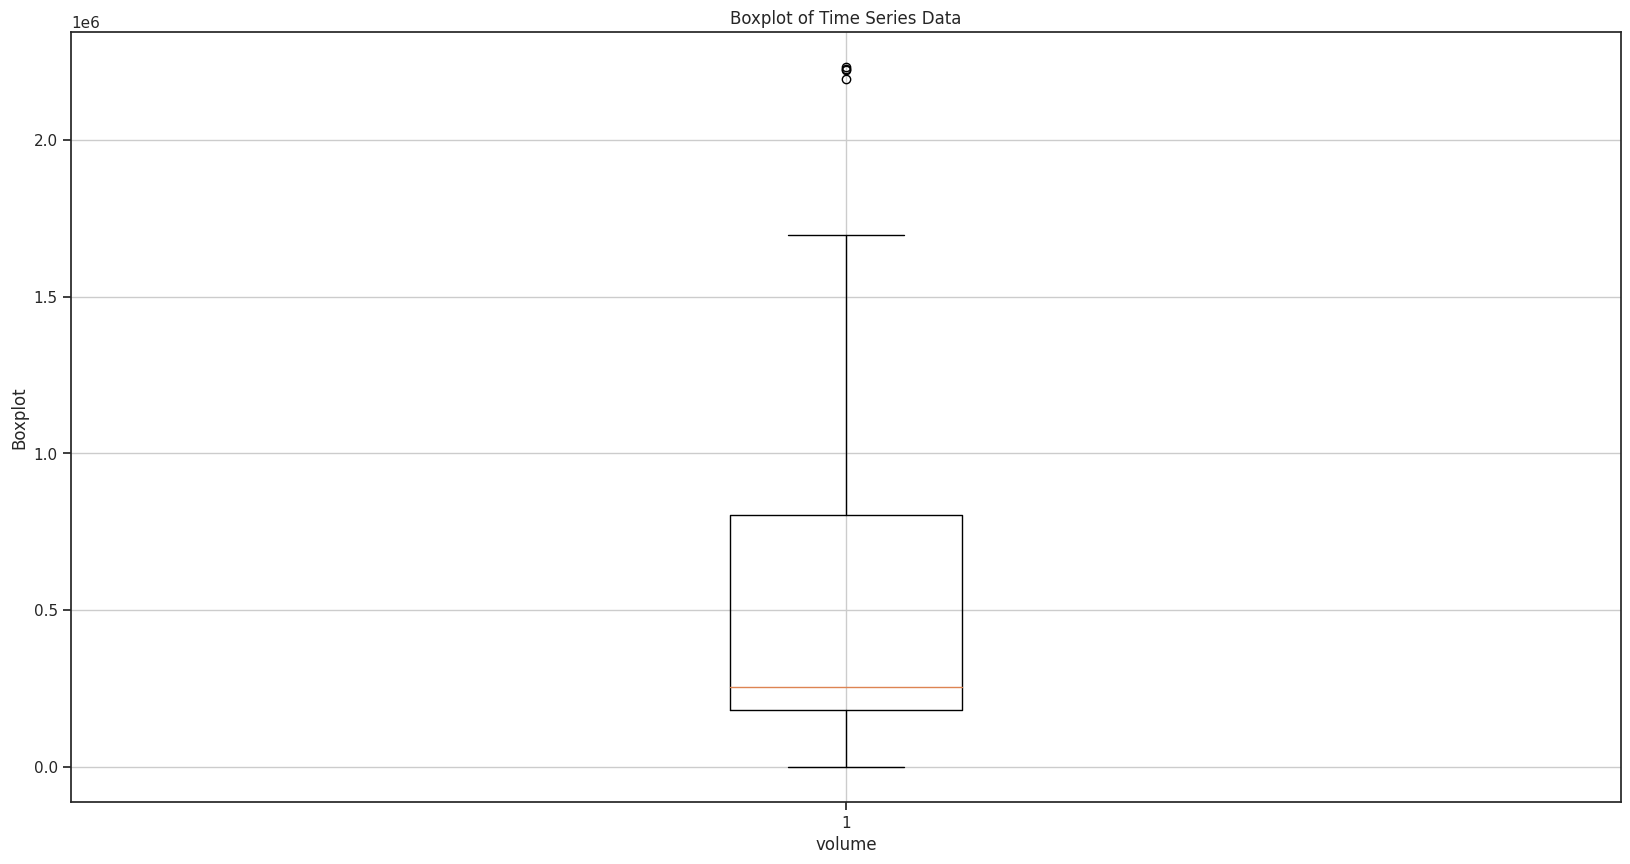

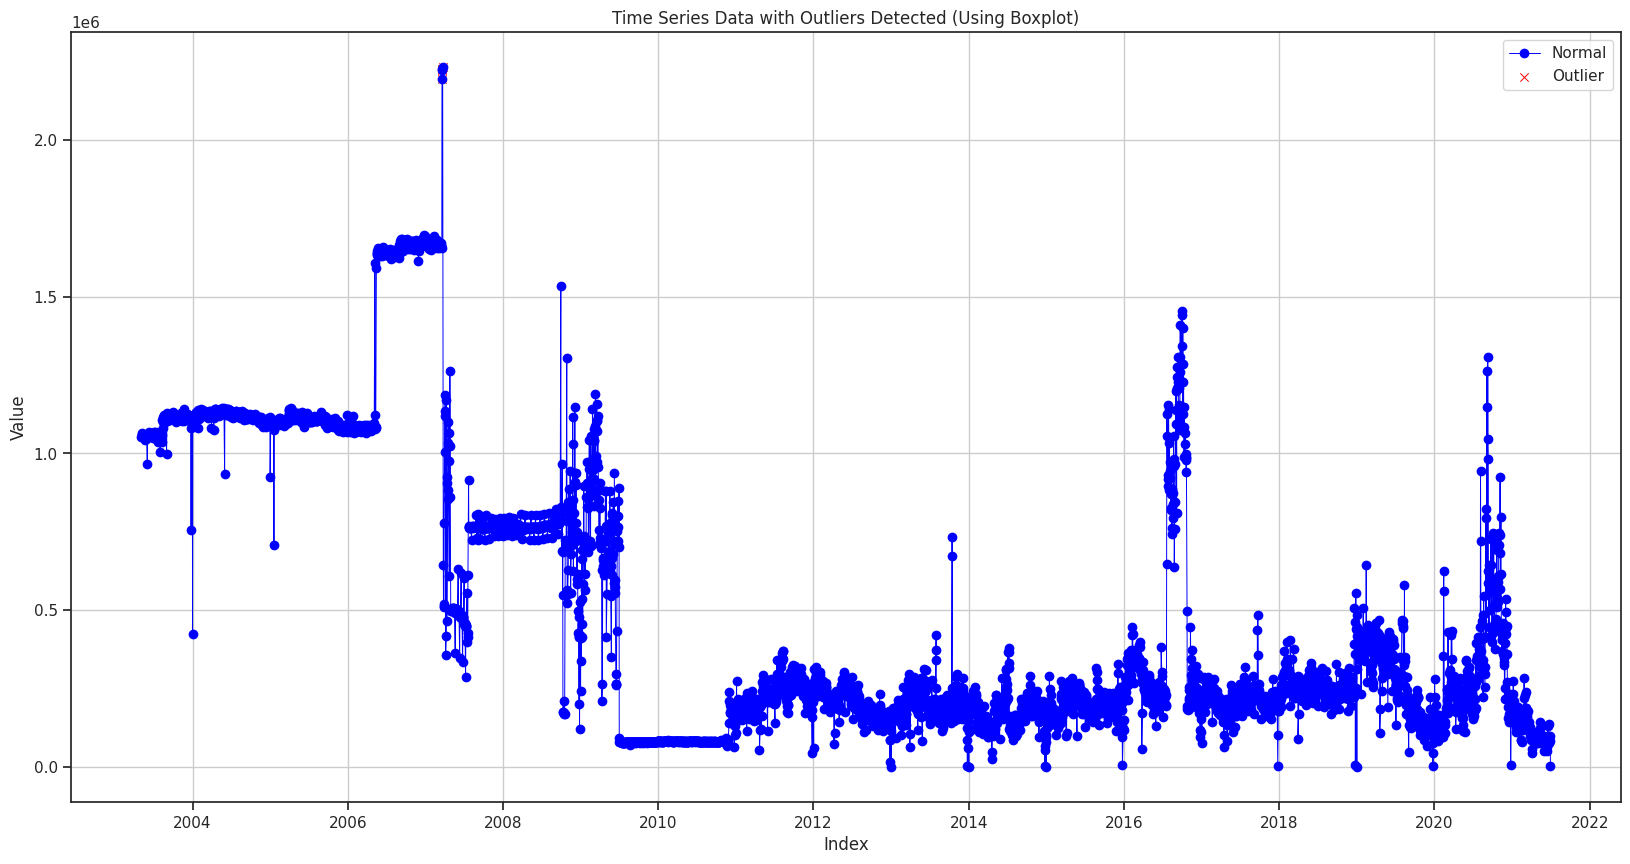

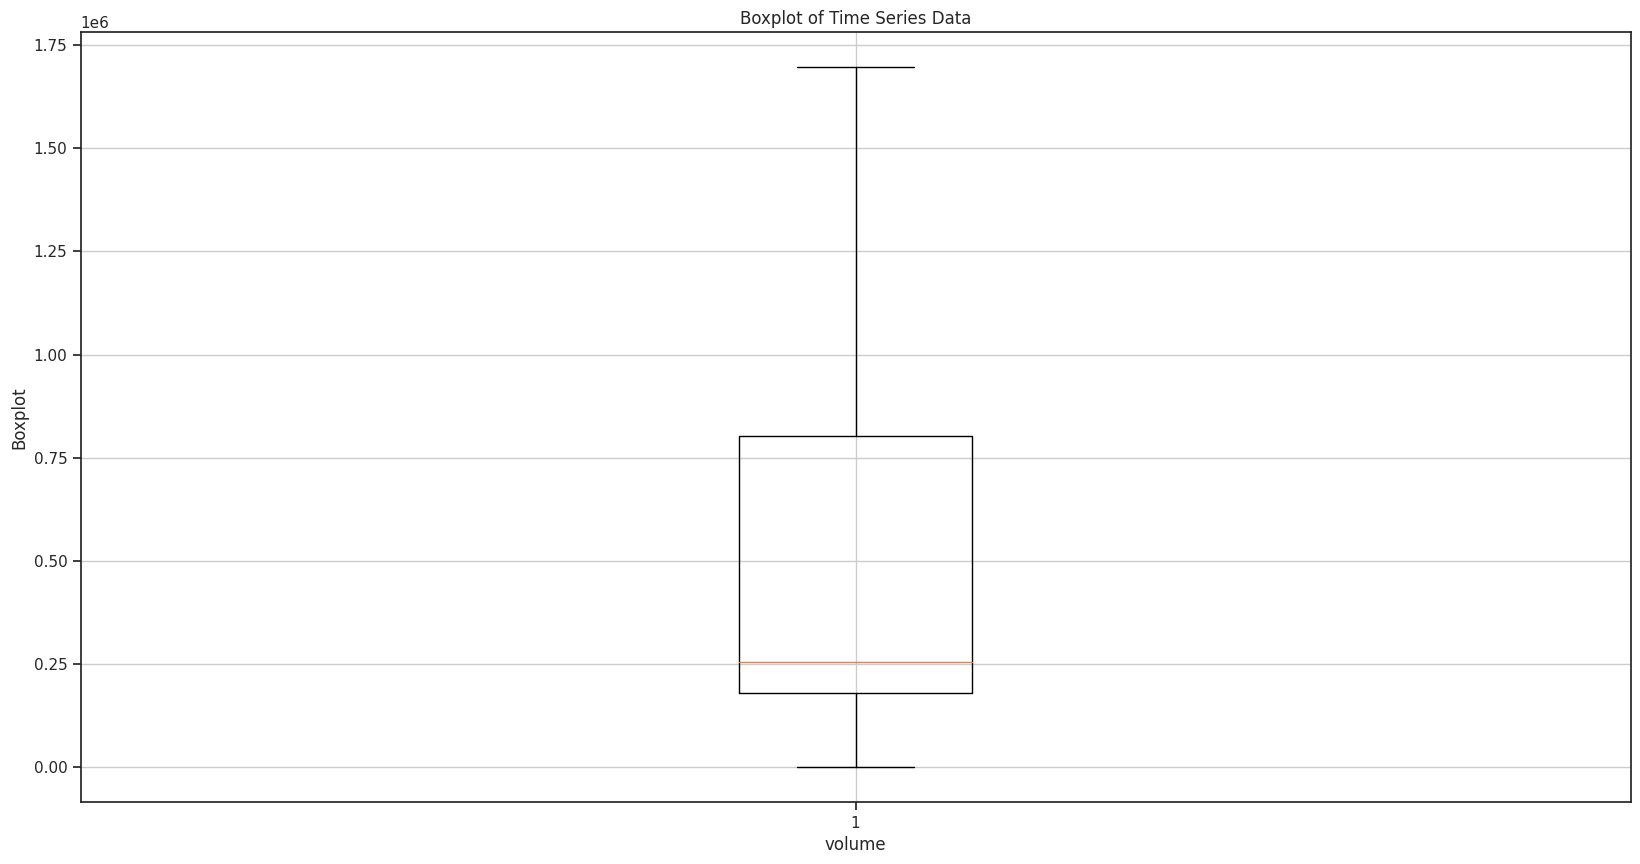

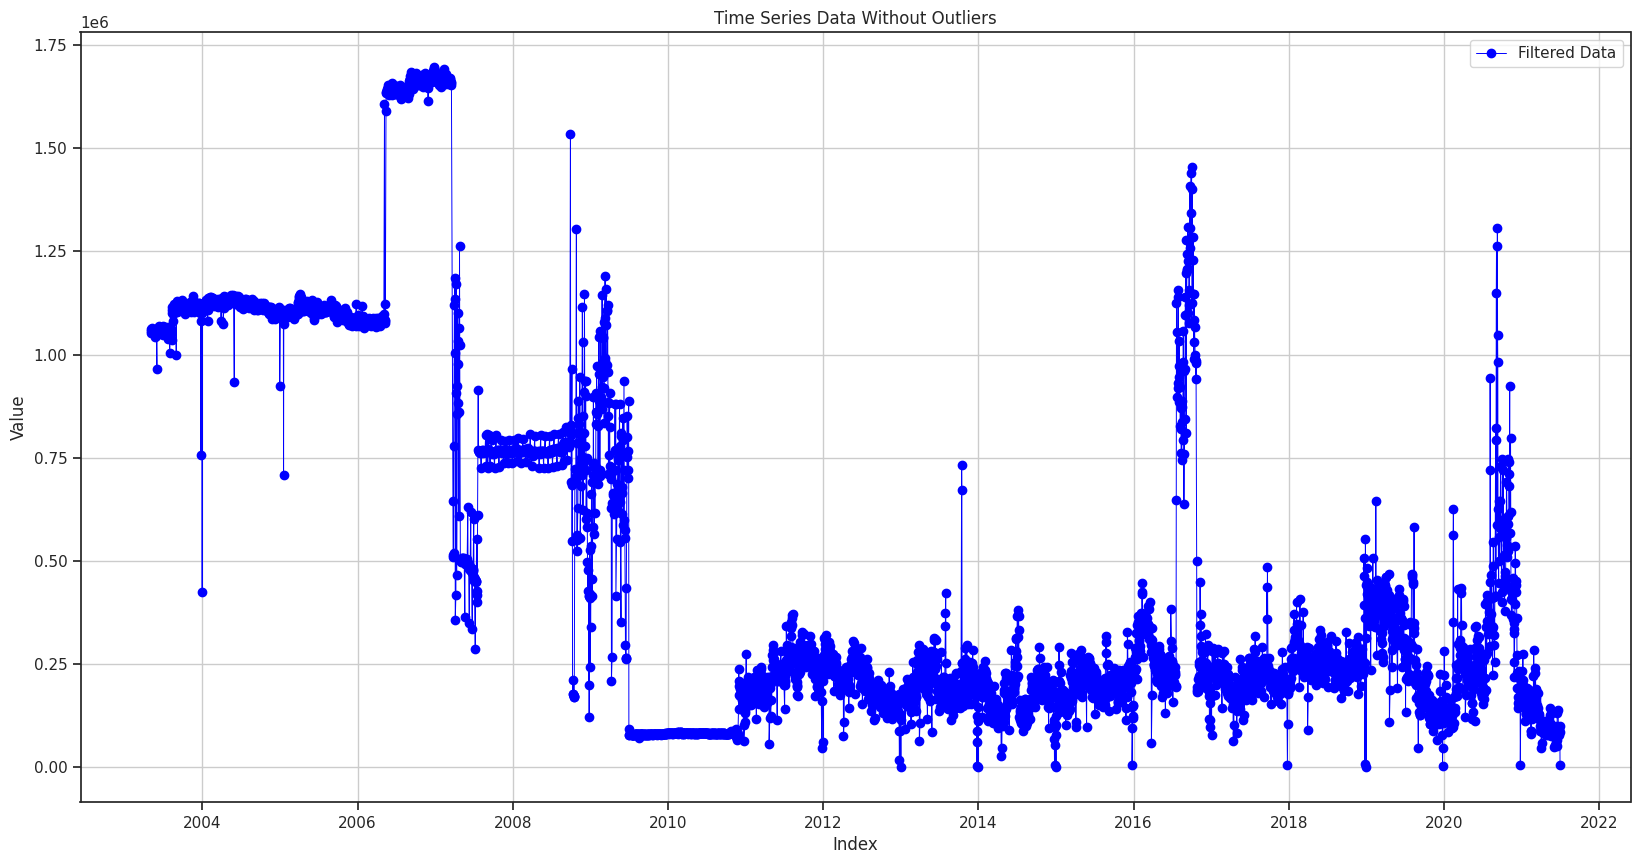

In [ ]:
plt.figure(figsize=(20, 10))
plt.boxplot(data['volume'])
plt.xlabel('volume')
plt.ylabel('Boxplot')
plt.title('Boxplot of Time Series Data')
plt.grid(True)
plt.show()

Q1 = data['volume'].quantile(0.25)
Q3 = data['volume'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (data['volume'] < lower_bound) | (data['volume'] > upper_bound)

plt.figure(figsize=(20, 10))
plt.plot(data.index, data['volume'], marker='o', linestyle='-', color='blue', label='Normal')
plt.scatter(data.index[outliers], data['volume'][outliers], marker='x', color='red', label='Outlier')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Time Series Data with Outliers Detected (Using Boxplot)')
plt.legend()
plt.grid(True)
plt.show()

filtered_data = data[~outliers]

plt.figure(figsize=(20, 10))
plt.boxplot(filtered_data['volume'])
plt.xlabel('volume')
plt.ylabel('Boxplot')
plt.title('Boxplot of Time Series Data')
plt.grid(True)
plt.show()

# Plot the filtered data without outliers
plt.figure(figsize=(20, 10))
plt.plot(filtered_data.index, filtered_data['volume'], marker='o', linestyle='-', color='blue', label='Filtered Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Time Series Data Without Outliers')
plt.legend()
plt.grid(True)
plt.show()

**Low filterpassing**

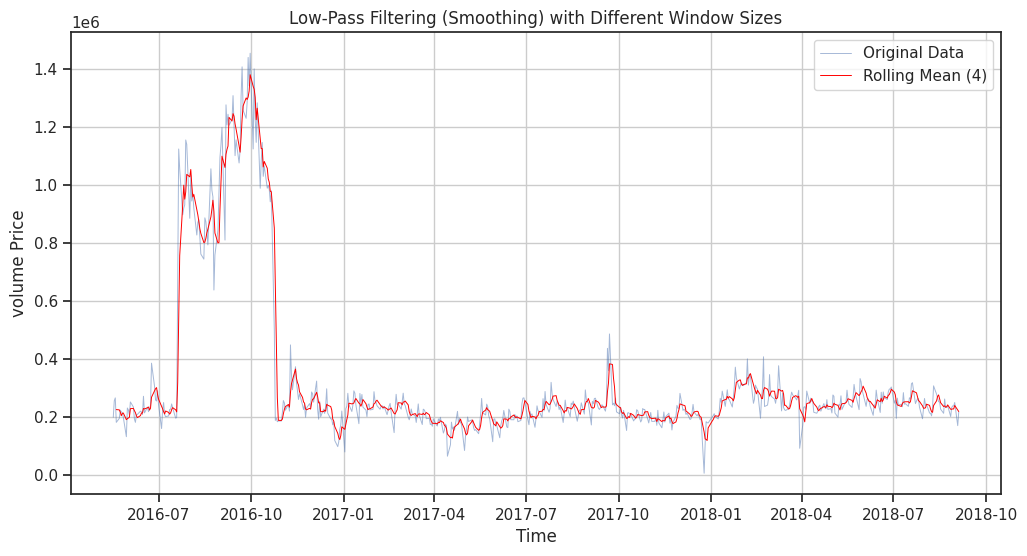

In [ ]:
data3 = data[3400:4000]
# Adjusted rolling window sizes
rolling_windows = [4]
colors = [ 'red']

# Plotting local means for different rolling window sizes
plt.figure(figsize=(12, 6))
# Use df.index instead of data.index for x-axis
plt.plot(data3.index, data3['volume'], label='Original Data',alpha=0.5) # Changed line

for i, window in enumerate(rolling_windows):
    rolling_mean = data3['volume'].rolling(window=window).mean()
    plt.plot(rolling_mean, label=f'Rolling Mean ({window})', color=colors[i])

plt.xlabel('Time')
plt.ylabel('volume Price')
plt.title('Low-Pass Filtering (Smoothing) with Different Window Sizes')
plt.legend()
plt.grid(True)
plt.show()

**Missing Values**

In [ ]:
missing_values = data.isnull()
missing_count = data.isnull().sum()
print(missing_values)
print(missing_count)

                           index   open   high    low  close  volume
Local time                                                          
2003-05-04 21:00:00+00:00  False  False  False  False  False   False
2003-05-05 21:00:00+00:00  False  False  False  False  False   False
2003-05-06 21:00:00+00:00  False  False  False  False  False   False
2003-05-07 21:00:00+00:00  False  False  False  False  False   False
2003-05-08 21:00:00+00:00  False  False  False  False  False   False
...                          ...    ...    ...    ...    ...     ...
2021-06-23 21:00:00+00:00  False  False  False  False  False   False
2021-06-24 21:00:00+00:00  False  False  False  False  False   False
2021-06-27 21:00:00+00:00  False  False  False  False  False   False
2021-06-28 21:00:00+00:00  False  False  False  False  False   False
2021-06-29 21:00:00+00:00  False  False  False  False  False   False

[4734 rows x 6 columns]
index     0
open      0
high      0
low       0
close     0
volume    0
dtype:

**Differencing between Mean AND seasonal component**

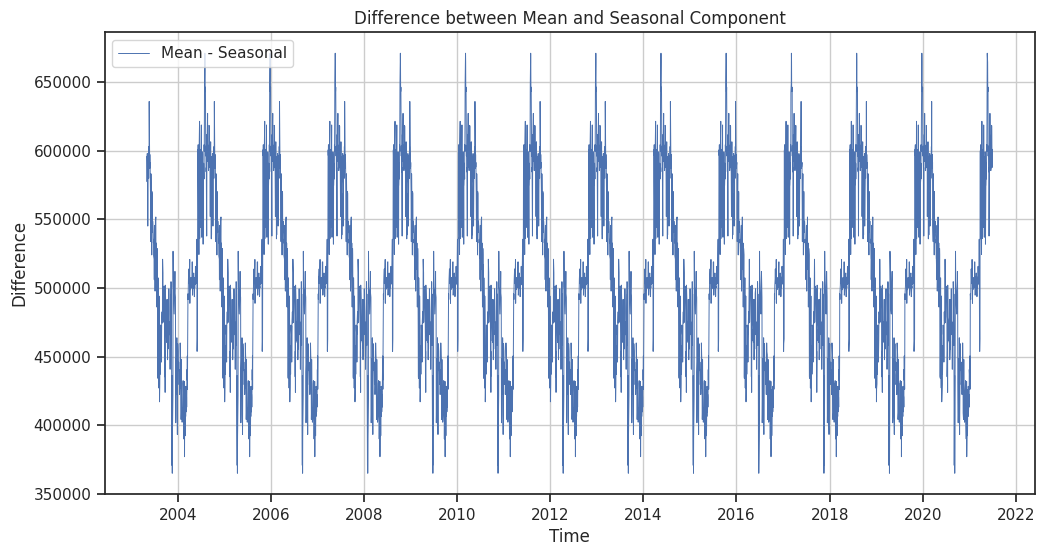

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Perform seasonal decomposition
result = sm.tsa.seasonal_decompose(data['volume'], model='additive', period=365)

mean_value = data['volume'].mean()
difference = mean_value - result.seasonal

plt.figure(figsize=(12, 6))
plt.plot(difference, label='Mean - Seasonal')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.title('Difference between Mean and Seasonal Component')
plt.legend()
plt.grid(True)
plt.show()

# **ARIMA and ETS model**

In [ ]:
data.head(10)

Local time     open     high      low    close  \
0  05.05.2003 00:00:00.000 GMT+0300  1.12354  1.13019  1.12030  1.12804   
1  06.05.2003 00:00:00.000 GMT+0300  1.12798  1.14510  1.12738  1.14368   
2  07.05.2003 00:00:00.000 GMT+0300  1.14367  1.14448  1.13275  1.13677   
3  08.05.2003 00:00:00.000 GMT+0300  1.13675  1.15092  1.13026  1.15026   
4  09.05.2003 00:00:00.000 GMT+0300  1.15002  1.15376  1.14362  1.14907   
5  10.05.2003 00:00:00.000 GMT+0300  1.14907  1.14907  1.14907  1.14907   
6  11.05.2003 00:00:00.000 GMT+0300  1.14907  1.14907  1.14907  1.14907   
7  12.05.2003 00:00:00.000 GMT+0300  1.14958  1.16244  1.14946  1.15457   
8  13.05.2003 00:00:00.000 GMT+0300  1.15427  1.15751  1.14630  1.15150   
9  14.05.2003 00:00:00.000 GMT+0300  1.15190  1.15388  1.14681  1.14970   

        volume  
0  1053162.797  
1  1061122.699  
2  1056796.590  
3  1058908.699  
4  1063989.000  
5        0.000  
6        0.000  
7  1056515.797  
8  1057731.395  
9  1053901.311

In [4]:
data.columns=['time', 'open', 'high', 'low', 'close', 'volume']
data=data[data['volume']!=0] #discard volume zero data points
data.reset_index(drop=True, inplace=True)
data.isna().sum()
data = data.interpolate()
# Reset the index to bring back the 'time' column
data = data.reset_index()
# Now set the 'time' column as the index
data = data.set_index(['time'])
data.index = pd.to_datetime(data.index, format='%d.%m.%Y %H:%M:%S.%f GMT%z', utc=True) # Set utc=True to handle timezone-aware datetimes

In [5]:
print(data.head(1))
print(data.tail(1))

                           index     open     high     low    close  \
time                                                                  
2003-05-04 21:00:00+00:00      0  1.12354  1.13019  1.1203  1.12804   

                                volume  
time                                    
2003-05-04 21:00:00+00:00  1053162.797  
                           index     open     high      low    close  \
time                                                                   
2021-06-29 21:00:00+00:00   4733  1.18973  1.19092  1.18452  1.18589   

                               volume  
time                                   
2021-06-29 21:00:00+00:00  4301.30191  


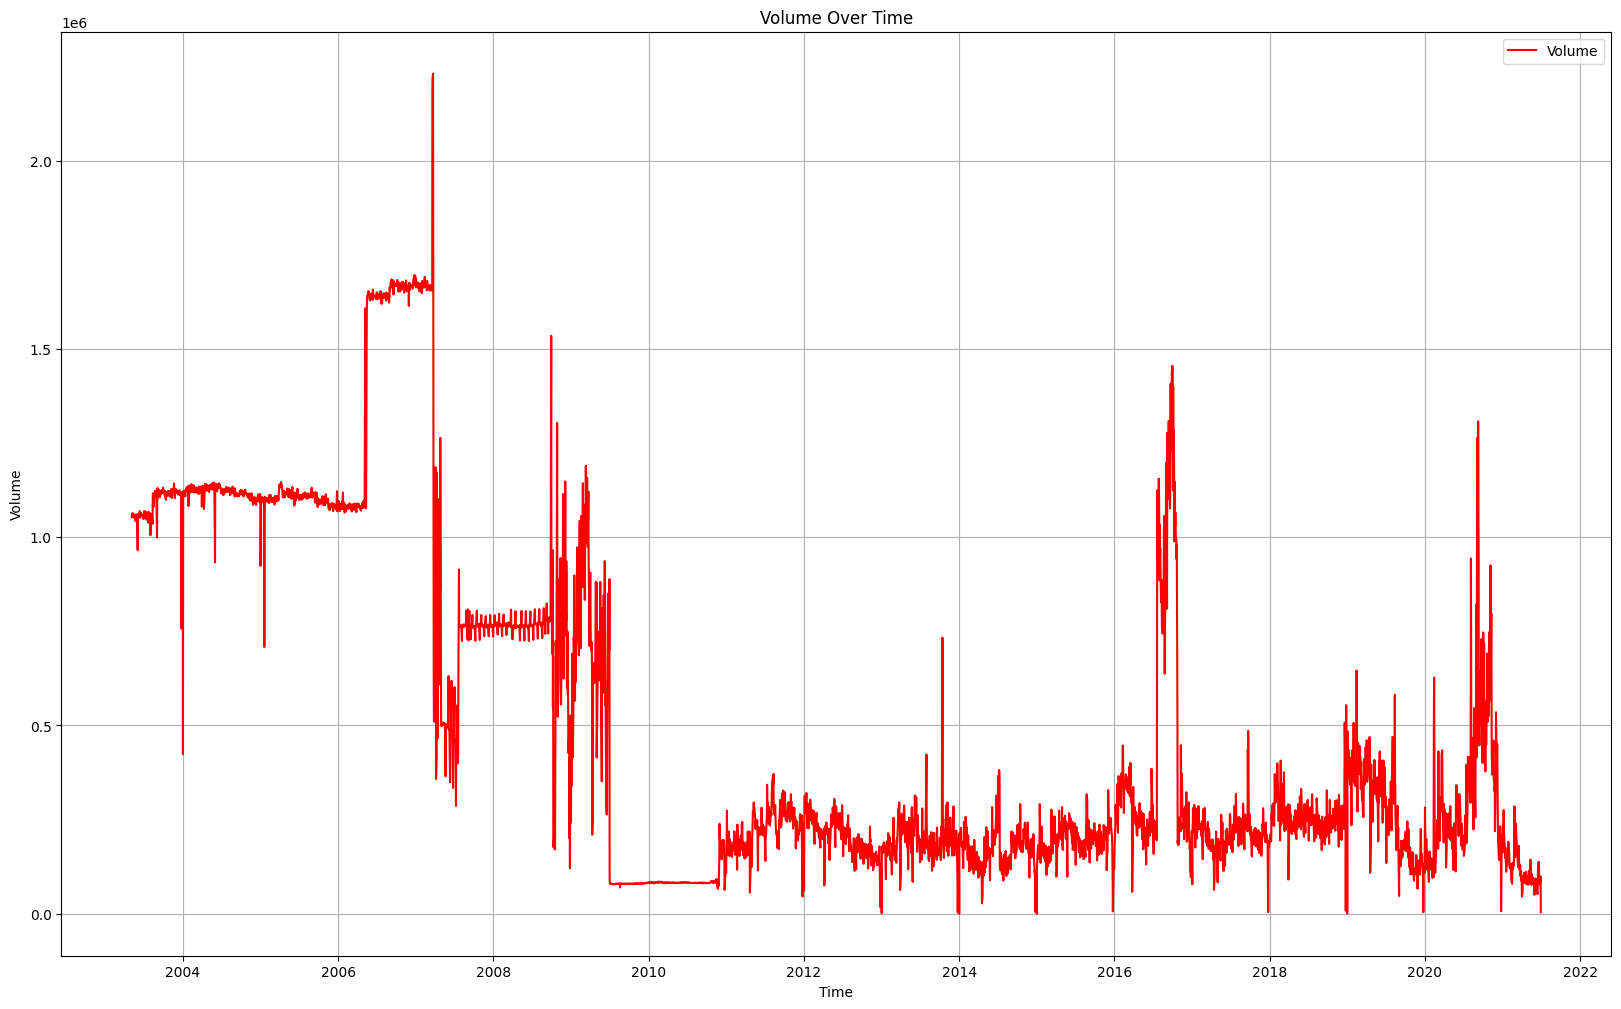

In [7]:
plt.figure(figsize=(20, 12))
plt.plot(data.index, data['volume'], label='Volume', color='red')

plt.title('Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data):
    # Perform Augmented Dickey-Fuller test
    dftest = adfuller(data)

    # Extract test statistics
    adf = dftest[0]  # ADF statistic
    pvalue = dftest[1]  # p-value
    critical_value = dftest[4]['5%']  # 5% critical value

    # Determine stationarity
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')
check_stationarity(data['volume'])

The series is NOT stationary


In [15]:
Q1 = data['volume'].quantile(0.25)
Q3 = data['volume'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (data['volume'] < lower_bound) | (data['volume'] > upper_bound)

df1 = data[~outliers]

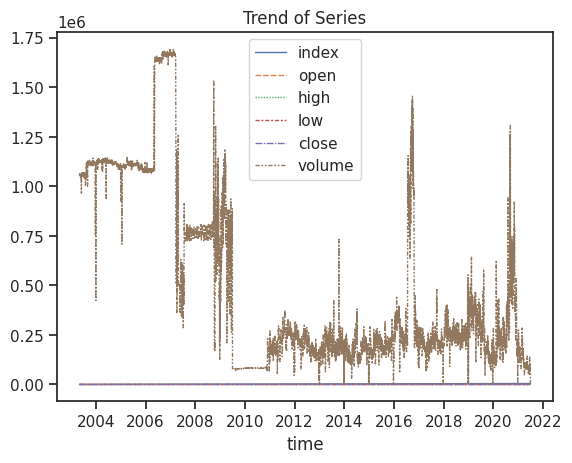

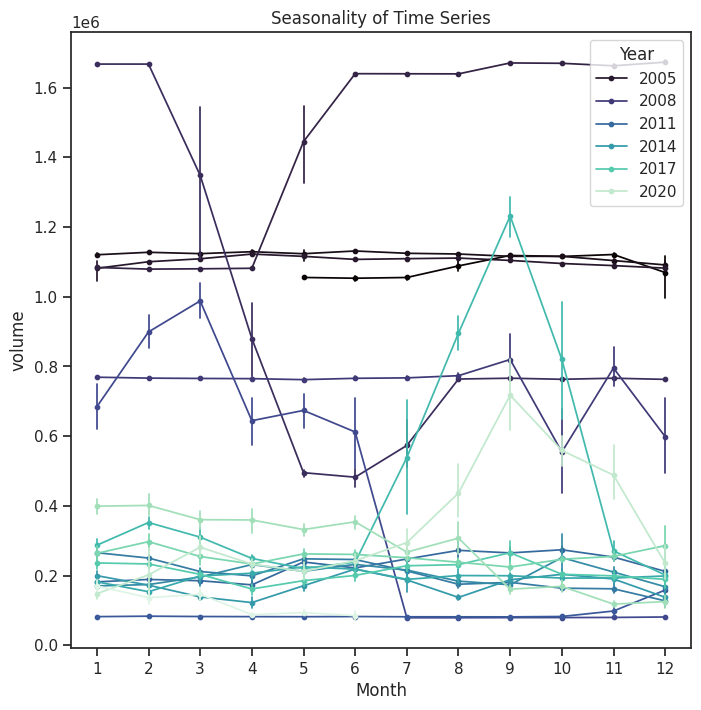

In [17]:
def characteristics(data, x, y, title):
    # Plotting the main time series
    ax = sns.lineplot(data=data, lw=1)
    ax.lines[0].set_linestyle('solid')
    ax.set_title(title)

    # Creating a copy of the data for seasonal analysis
    df_temp = data.copy()
    df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
    df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month

    # Plotting seasonality
    plt.figure(figsize=(8, 8))
    plt.title('Seasonality of Time Series')
    sns.set(style="ticks", rc={"lines.linewidth": 0.7})
    sns.pointplot(x='Month', y=y, hue='Year', data=df_temp, palette='mako', linestyles='-')
characteristics(df1, df1.index, 'volume', 'Trend of Series')

<Figure size 1200x600 with 0 Axes>

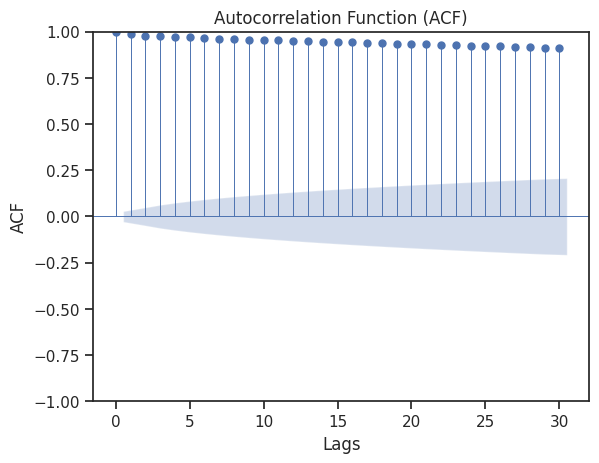

<Figure size 1200x600 with 0 Axes>

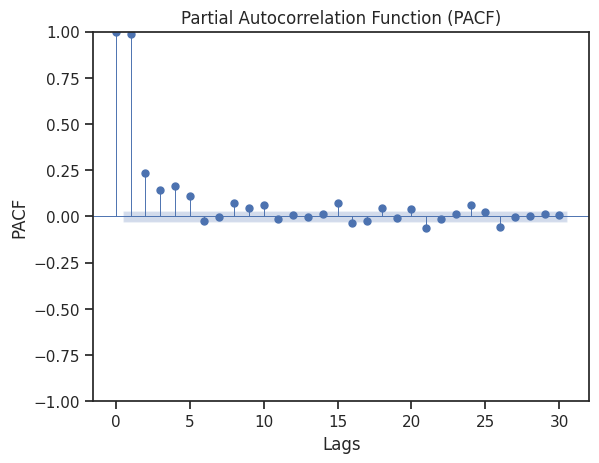

In [18]:
plt.figure(figsize=(12, 6))
plot_acf(df1['volume'], lags=30, title='Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df1['volume'], lags=30, title='Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

**Check for Stationarity:**
A time series is said to be stationary if the mean, variance and autocorrelation does not vary
over time. Trend, seasonality and other characteristics varying according to time will affect
modelling as underlying pattern of the data is not learnt by the model due to non-stationarity.
Thus stationarity needs to be achieved.
The following are the methods for stationarity test:
Rolling Window Analysis
Dickey Fuller Test

**Rolling Window Analysis **
 It refers to calculating the values based on previous ‘window size’ of values. It analyses
if the variation is time dependent and if yes for what size of the window.
This helps use to know the nature of coefficients of the data with respect to time. Our
aim is to achieve parameter stability of the data.
 As we have found that the data is seasonal in the above graph, we set the window  
size = 12.

**Augmented Dickey Fuller Test **
On an explanatory perspective,
 Null hypothesis H0 implies that unit root=1, the time series is not stationary.
 Alternate hypothesis H1 implies that unit root <1, and the series is stationary.
We us test statistic value, critical values at 1%, 5% and 10% confidence intervals and p value
for evaluating the test results. When the test statistic < = critical values, p value < 0.05 indicates
that null hypothesis can be rejected and data is stationary.

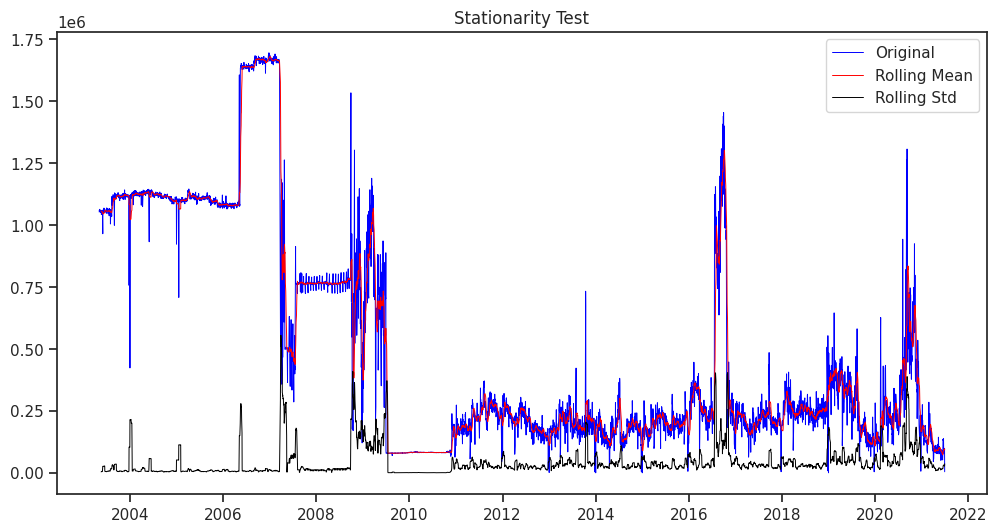

Results of Dickey-Fuller Test:
Test Statistic                   -2.336578
p-value                           0.160442
#Lags Used                       32.000000
Number of Observations Used    4697.000000
Critical Value (1%)              -3.431743
Critical Value (5%)              -2.862156
Critical Value (10%)             -2.567098
dtype: float64


In [19]:
def stationarity_test(df, window, title, col_name):
    # Perform rolling statistics
    roll_mean = df[col_name].rolling(window=window).mean()
    roll_std = df[col_name].rolling(window=window).std()

    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(df[col_name], color='blue', label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title(title)
    plt.show()

    # Perform Augmented Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[col_name], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Example usage (replace 'df' and 'close' with your actual DataFrame and column name)
stationarity_test(df1, window=12, title='Stationarity Test', col_name='volume')

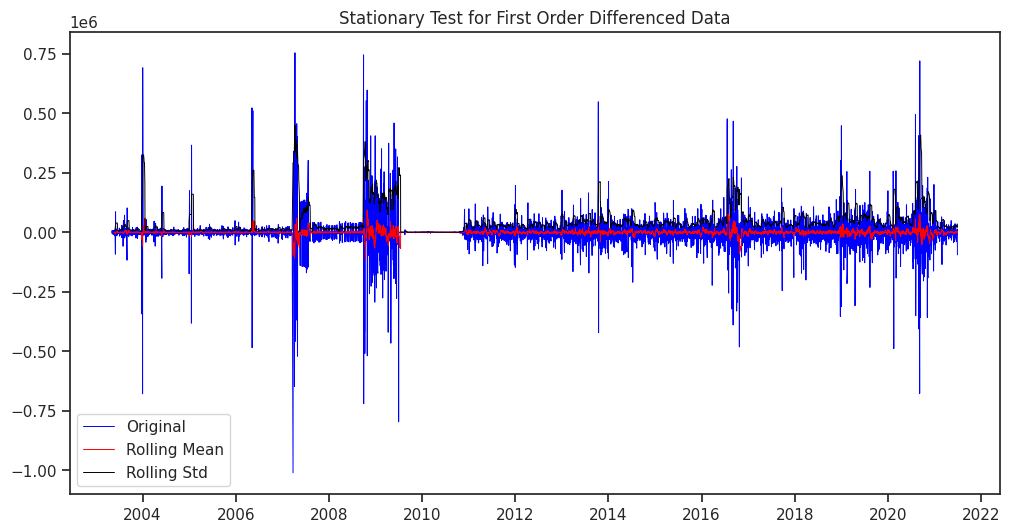

Results of Dickey-Fuller Test:
Test Statistic                -1.294312e+01
p-value                        3.500751e-24
#Lags Used                     3.100000e+01
Number of Observations Used    4.697000e+03
Critical Value (1%)           -3.431743e+00
Critical Value (5%)           -2.862156e+00
Critical Value (10%)          -2.567098e+00
dtype: float64


In [20]:
def differencing(data, order, col_name): # Add col_name as a parameter
    # Perform differencing on the specified column
    df_diff = data[col_name].diff(periods=order)

    # Drop NaN values resulting from differencing
    df_diff.dropna(inplace=True)

    # Create a new DataFrame with the differenced values and original index
    df_diff = pd.DataFrame(df_diff, columns=[col_name], index=data.index[order:])

    return df_diff

# Specify the column to difference ('volume' in this case)
df_diff = differencing(df1, 1, 'volume')

# Perform stationarity test on differenced data, passing the DataFrame instead of the Series
stationarity_test(df_diff, window=12, title='Stationary Test for First Order Differenced Data', col_name='volume')

<Figure size 1200x600 with 0 Axes>

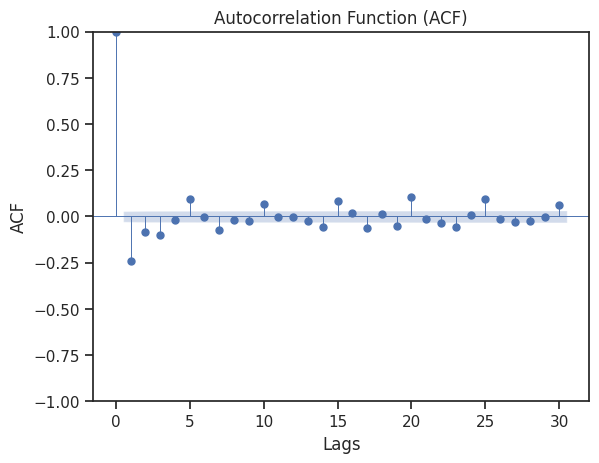

<Figure size 1200x600 with 0 Axes>

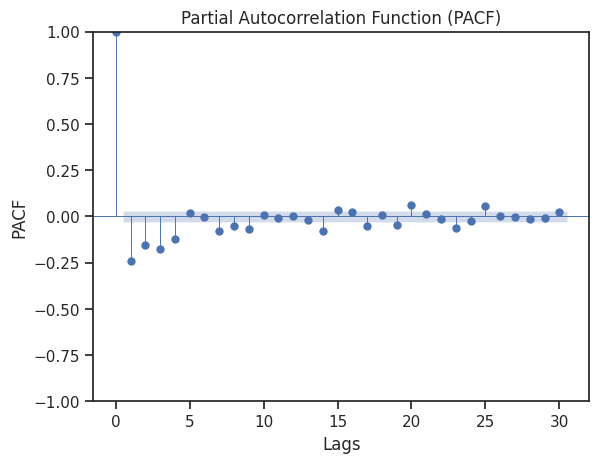

In [22]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 6))
# Pass the 'close' column of the df_diff DataFrame as the 'x' argument
plot_acf(df_diff['volume'], lags=30, title='Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
# Pass the 'close' column of the df_diff DataFrame as the 'x' argument
plot_pacf(df_diff['volume'], lags=30, title='Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

In [24]:
#!pip install pmdarima
import pmdarima as pm
from pmdarima import auto_arima

# Restart the kernel after installation (sometimes required)

auto_model = auto_arima(data['volume'], trace= True, suppress_warnings=True)

# Fit the model
#auto_model.fit(df_diff['volume'])
auto_model.summary()

  Using cached pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.1 MB)
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=119345.426, Time=6.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=119864.817, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=119635.301, Time=0.78 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=119538.293, Time=1.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=119862.857, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=119346.304, Time=3.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=119345.843, Time=8.49 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=119342.599, Time=4.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=119341.314, Time=3.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=119441.788, Time=1.83 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=119355.614, Time=4.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=119551.485, Time=0.73 sec
 ARIMA(4,1,0)(0,0,0)[

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4734
Model:               SARIMAX(3, 1, 1)   Log Likelihood              -59664.252
Date:                Mon, 24 Jun 2024   AIC                         119338.504
Time:                        04:56:53   BIC                         119370.816
Sample:                             0   HQIC                        119349.860
                               - 4734                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4520      0.013     33.881      0.000       0.426       0.478
ar.L2          0.0069      0.007      0.977      0.329      -0.007       0.021
ar.L3         -0.0465      0.007     -6.412      0.000      -0.061      -0.032
ma.L1         -0.7518      0.013    -57.699      0.000      -0.777      -0.726
sigma2       5.31e+09   1.57e-12   3.37e+21      0.000    5.31e+09    5.31e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):            789745.25
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                            -1.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        66.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.73e+36. Standard errors may be unstable.
"""

In [26]:
import pmdarima as pm

# Restart the kernel after installation (sometimes required)

auto_model = pm.auto_arima(df_diff['volume'], suppress_warnings=True)

# Fit the model
auto_model.fit(df_diff['volume'])

ARIMA(order=(4, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [27]:
print(data.shape)
split_point = int(len(df_diff) * 0.8)

# Split into train and test sets
train = df_diff.iloc[:split_point]
test = df_diff.iloc[split_point:]

# Verify lengths
print("Train length:", len(train))
print("Test length:", len(test))

(4734, 6)
Train length: 3783
Test length: 946


In [29]:
model = ARIMA(df_diff['volume'], order=(4, 0, 0))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 volume   No. Observations:                 4729
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -59418.776
Date:                Mon, 24 Jun 2024   AIC                         118849.552
Time:                        05:03:27   BIC                         118888.321
Sample:                             0   HQIC                        118863.178
                               - 4729                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -221.7935    543.364     -0.408      0.683   -1286.767     843.180
ar.L1         -0.3258      0.004    -75.182      0.000      -0.334      -0.317
ar.L2         -0.2252      0.006    -40.691      0.0

In [30]:
model1 = ARIMA(df_diff['volume'], order=(4, 0, 3))
result1 = model1.fit()
print(result1.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 volume   No. Observations:                 4729
Model:                 ARIMA(4, 0, 3)   Log Likelihood              -59408.780
Date:                Mon, 24 Jun 2024   AIC                         118835.560
Time:                        05:04:28   BIC                         118893.714
Sample:                             0   HQIC                        118856.000
                               - 4729                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -221.7935    472.268     -0.470      0.639   -1147.421     703.834
ar.L1          0.0958      0.077      1.252      0.210      -0.054       0.246
ar.L2         -0.5777      0.044    -13.206      0.0

In [32]:
model2 = ARIMA(train['volume'], order=(4, 0, 3))
result2 = model2.fit()
print(result2.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 volume   No. Observations:                 3783
Model:                 ARIMA(4, 0, 3)   Log Likelihood              -47419.824
Date:                Mon, 24 Jun 2024   AIC                          94857.648
Time:                        05:07:11   BIC                          94913.793
Sample:                             0   HQIC                         94877.606
                               - 3783                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -219.7448    577.806     -0.380      0.704   -1352.223     912.734
ar.L1         -0.1451      0.039     -3.691      0.000      -0.222      -0.068
ar.L2         -0.6573      0.027    -24.323      0.0

In [39]:
start=len(train)
end=len(train)+len(test)-1
prediction = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(4,0,0) Predictions')
print(prediction)

time
2017-11-09 22:00:00+00:00   -14496.112540
2017-11-12 22:00:00+00:00     7124.655669
2017-11-13 22:00:00+00:00     7645.747313
2017-11-14 22:00:00+00:00    -1093.715209
2017-11-15 22:00:00+00:00    -7664.025057
                                 ...     
2021-06-23 21:00:00+00:00     5093.458434
2021-06-24 21:00:00+00:00     7530.568691
2021-06-27 21:00:00+00:00     8068.052833
2021-06-28 21:00:00+00:00     2551.250836
2021-06-29 21:00:00+00:00    -2643.226933
Name: ARIMA(4,0,0) Predictions, Length: 946, dtype: float64


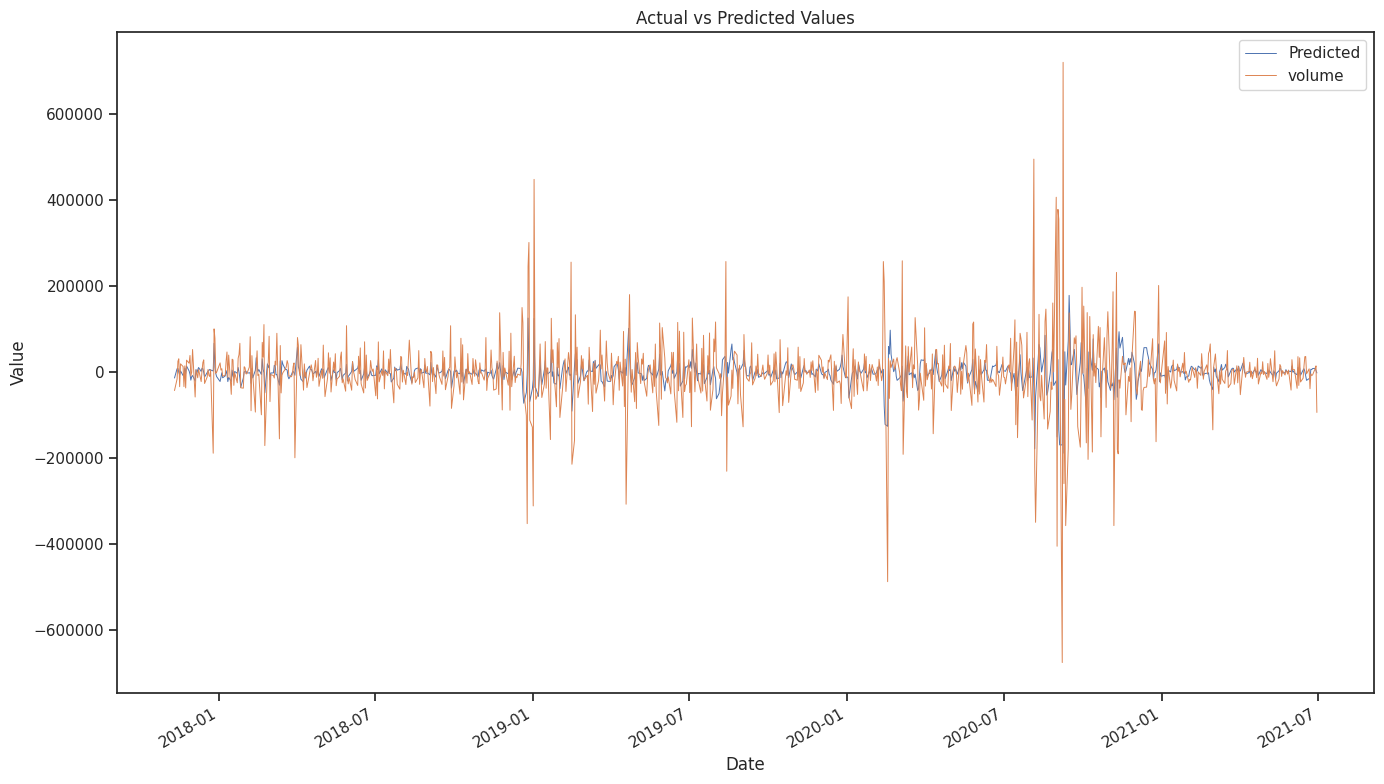

In [40]:
# Increase the size of the plot
plt.figure(figsize=(14, 8))  # Adjust width and height as needed

# Plot predicted values
prediction.plot(label='Predicted', legend=True)

# Plot actual values from 'test'
test['volume'].plot(label='volume', legend=True)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')

# Display plot
plt.tight_layout()
plt.show()


In [41]:
test['volume'].mean()

-229.98599079281198

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(prediction, test['volume'])
print('mse:', mse)
rmse = np.sqrt(mean_squared_error(prediction, test['volume']))
print('rmse:', rmse)

mse: 5731602507.640434
rmse: 75707.34777840546


In [44]:
index_future_dates=pd.date_range(start='2021-06-30',end='2023-06-30')
#print(index_future_dates)
pred1 = results.predict(start=len(train), end=len(train)+len(index_future_dates)-1, dynamic=False, typ='levels').rename('ARIMA(4,0,0) Predictions')
#print(pred1)
pred1.index=index_future_dates
print(pred1)

2021-06-30    -14496.112540
2021-07-01      7124.655669
2021-07-02      7645.747313
2021-07-03     -1093.715209
2021-07-04     -7664.025057
                  ...      
2023-06-26     43806.330259
2023-06-27     52245.328878
2023-06-28    -31818.831615
2023-06-29    -20884.090923
2023-06-30   -151518.751933
Freq: D, Name: ARIMA(4,0,0) Predictions, Length: 731, dtype: float64


<Axes: >

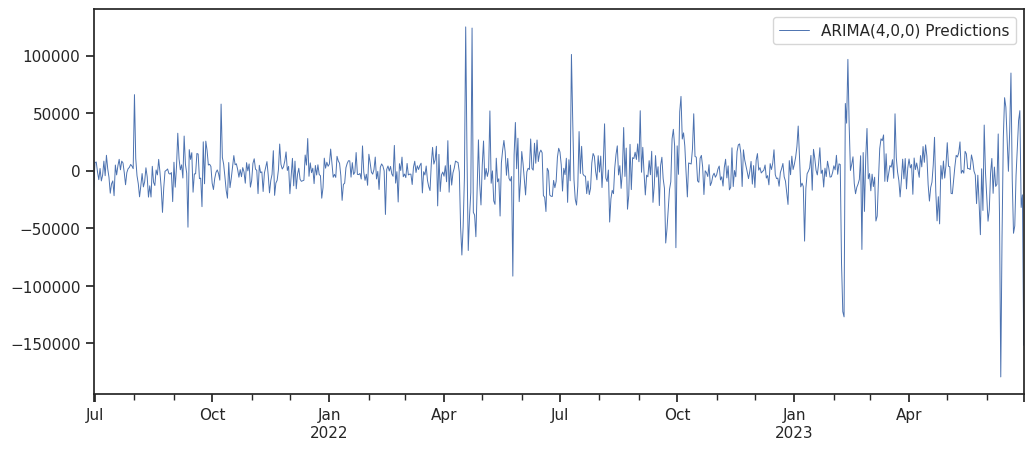

In [45]:
pred1.plot(figsize=(12,5),legend=True)

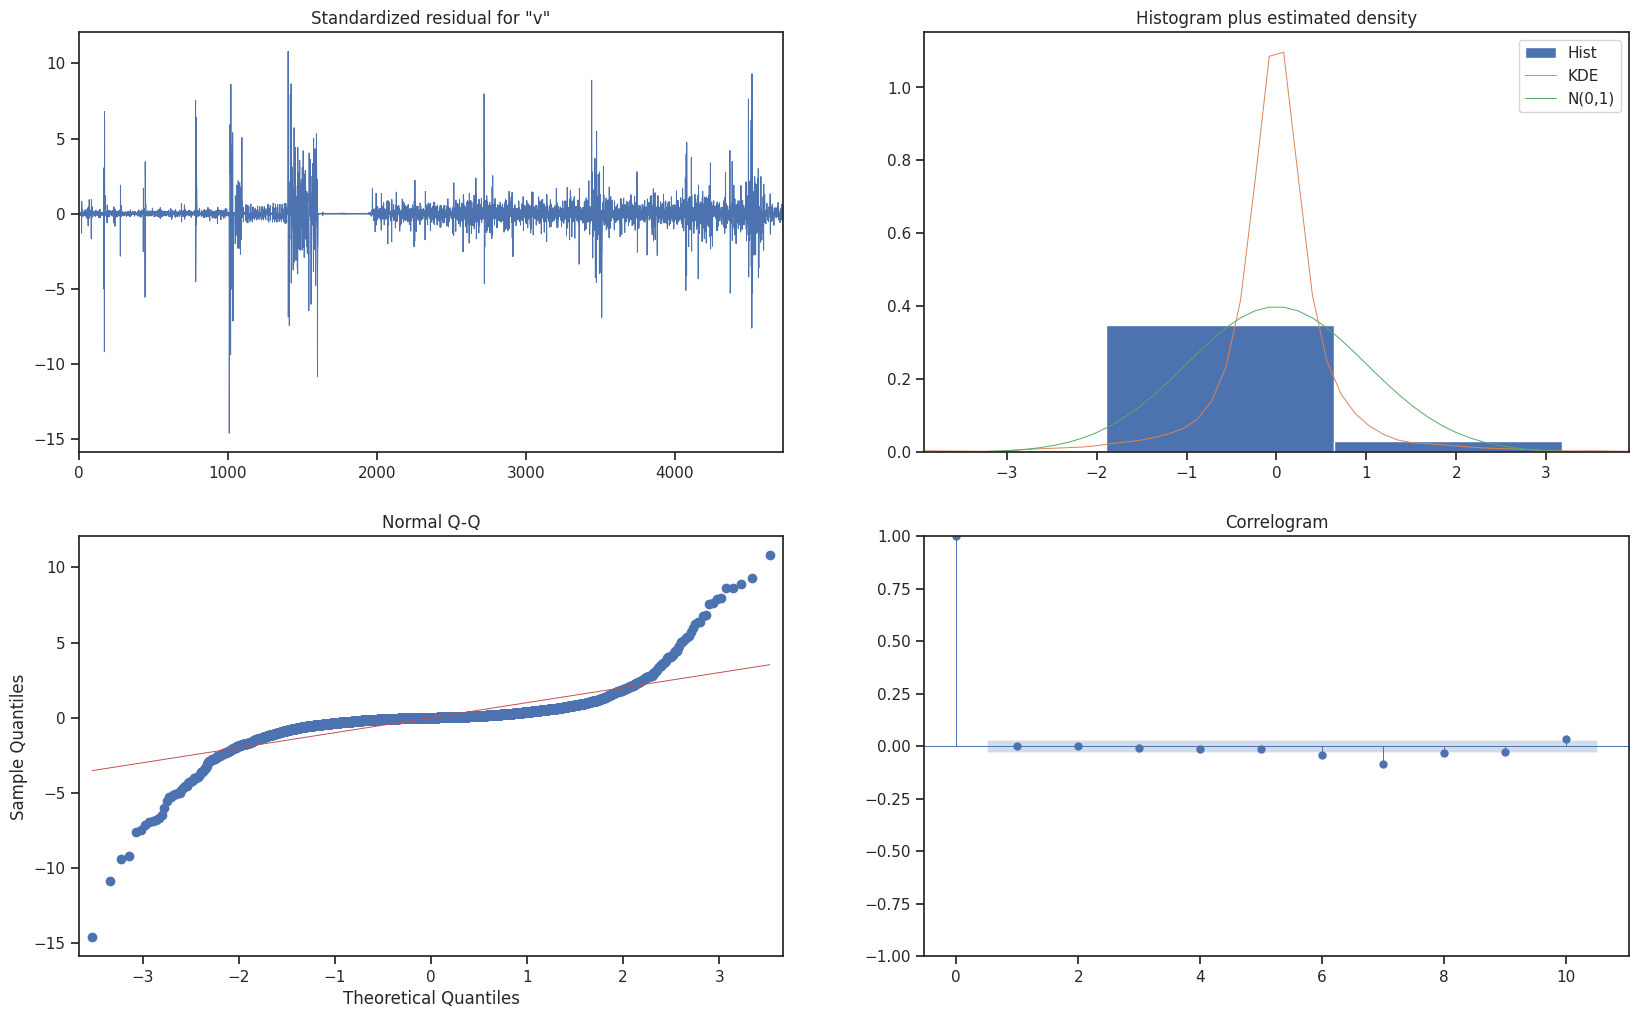

In [ ]:
results.plot_diagnostics(figsize=(20,12))
plt.show()

#**ETS model**

In [48]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Import the class

df_monthly = data['volume'].resample('M').sum()
model = ExponentialSmoothing(df_monthly, trend='add', seasonal='add', seasonal_periods=12) # Now you can use the class
fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


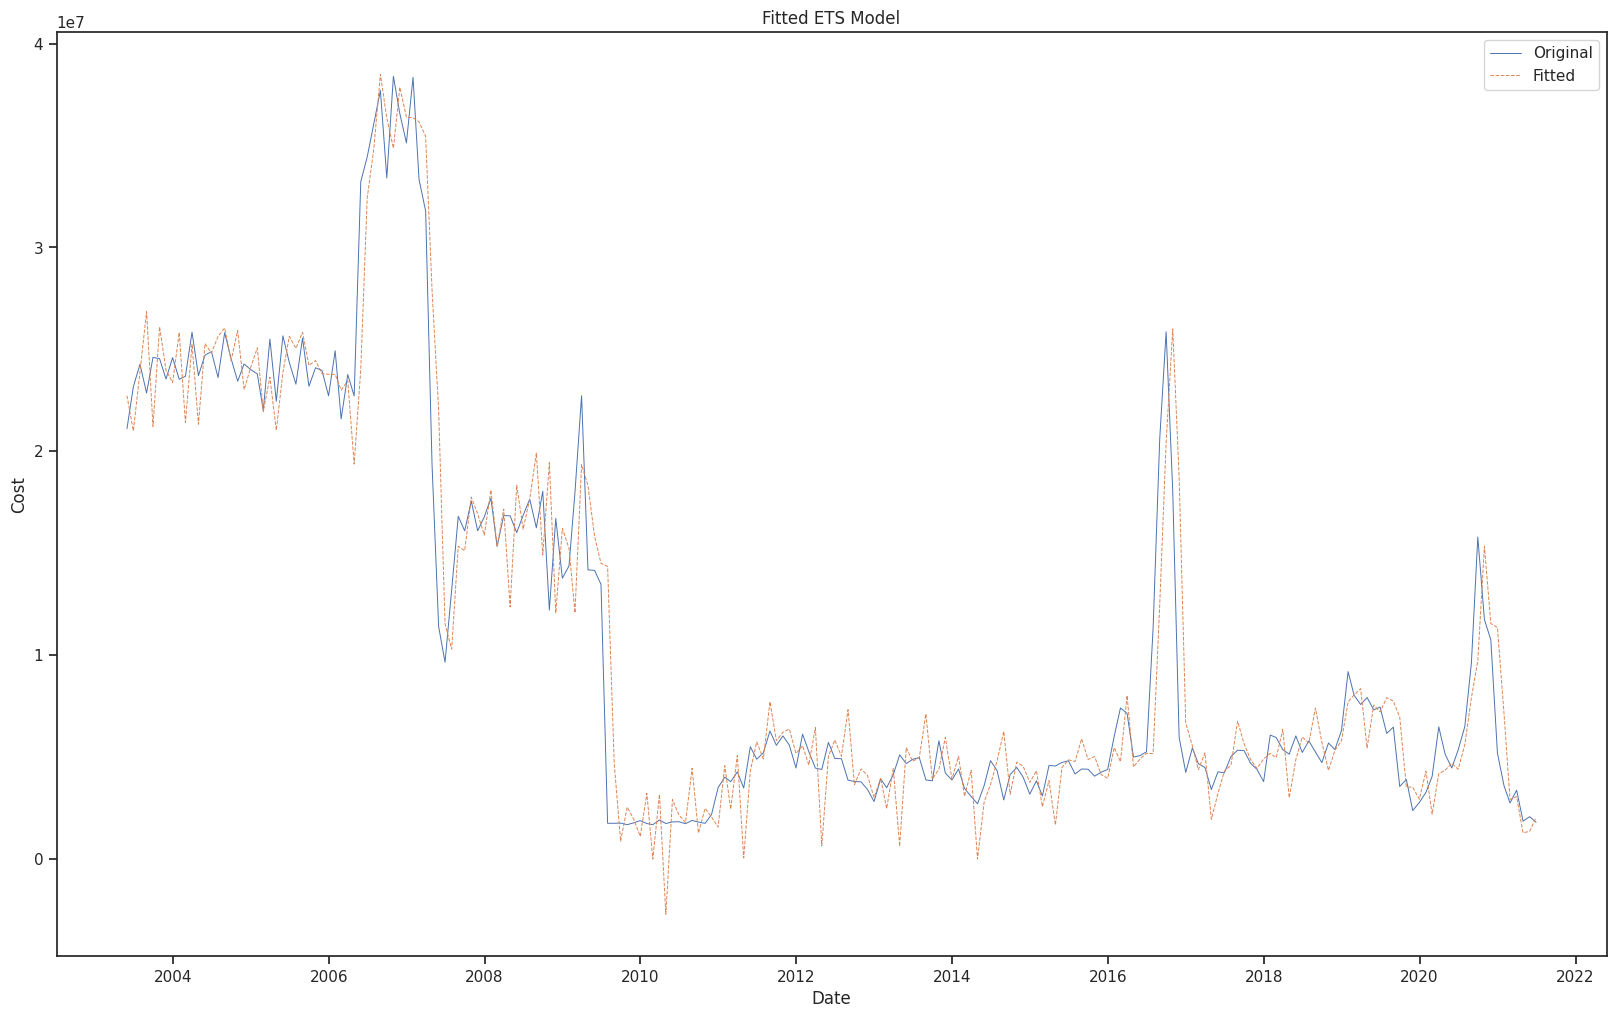

In [50]:
plt.figure(figsize=(20, 12))
plt.plot(df_monthly, label='Original')
plt.plot(fit.fittedvalues, label='Fitted', linestyle='--')
plt.title('Fitted ETS Model')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()
plt.show()

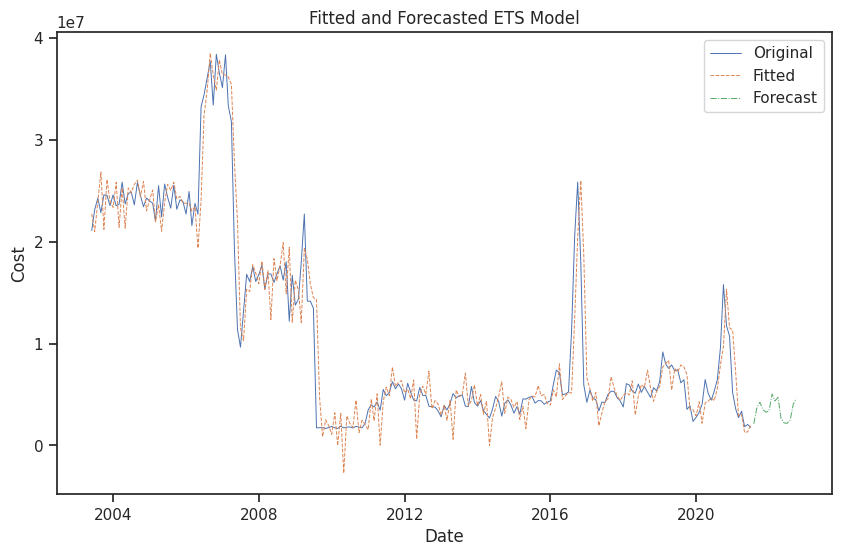

2021-07-31 00:00:00+00:00    2.133954e+06
2021-08-31 00:00:00+00:00    3.685008e+06
2021-09-30 00:00:00+00:00    4.249447e+06
2021-10-31 00:00:00+00:00    3.524834e+06
2021-11-30 00:00:00+00:00    3.263233e+06
2021-12-31 00:00:00+00:00    3.399299e+06
2022-01-31 00:00:00+00:00    5.055553e+06
2022-02-28 00:00:00+00:00    4.379812e+06
2022-03-31 00:00:00+00:00    4.715268e+06
2022-04-30 00:00:00+00:00    2.668790e+06
2022-05-31 00:00:00+00:00    2.217648e+06
2022-06-30 00:00:00+00:00    2.170674e+06
2022-07-31 00:00:00+00:00    2.497011e+06
2022-08-31 00:00:00+00:00    4.048065e+06
2022-09-30 00:00:00+00:00    4.612504e+06
Freq: M, dtype: float64


In [53]:
forecast_steps = 15
forecast = fit.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 6))
plt.plot(df_monthly, label='Original')
plt.plot(fit.fittedvalues, label='Fitted', linestyle='--')
plt.plot(forecast, label='Forecast', linestyle='-.')
plt.title('Fitted and Forecasted ETS Model')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()
plt.show()

# Print the forecasted values
print(forecast)

In [55]:
train_size = int(len(df_monthly) * 0.8)
train, test = df_monthly[:train_size], df_monthly[train_size:]

model1 = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
fit = model1.fit()
test_predictions = fit.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [56]:
print(fit.summary())

                        ExponentialSmoothing Model Results                        
Dep. Variable:                   volume   No. Observations:                    174
Model:             ExponentialSmoothing   SSE                 1359259306120515.500
Optimized:                         True   AIC                             5197.479
Trend:                         Additive   BIC                             5248.024
Seasonal:                      Additive   AICC                            5201.892
Seasonal Periods:                    12   Date:                   Mon, 24 Jun 2024
Box-Cox:                          False   Time:                           05:28:46
Box-Cox Coeff.:                    None                                           
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9242857                alpha                 True
smoothi

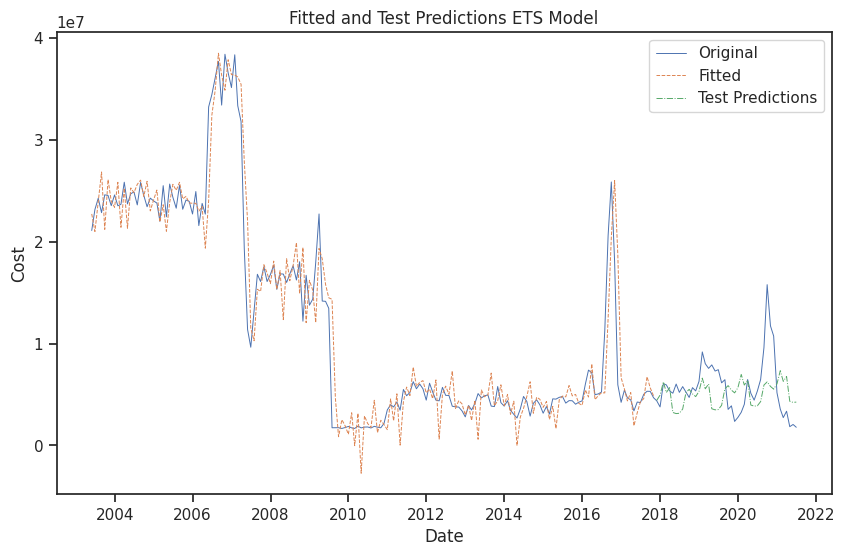

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(df_monthly, label='Original')
plt.plot(fit.fittedvalues, label='Fitted', linestyle='--')
plt.plot(test_predictions, label='Test Predictions', linestyle='-.')
plt.title('Fitted and Test Predictions ETS Model')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, test_predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 8357392648122.854


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


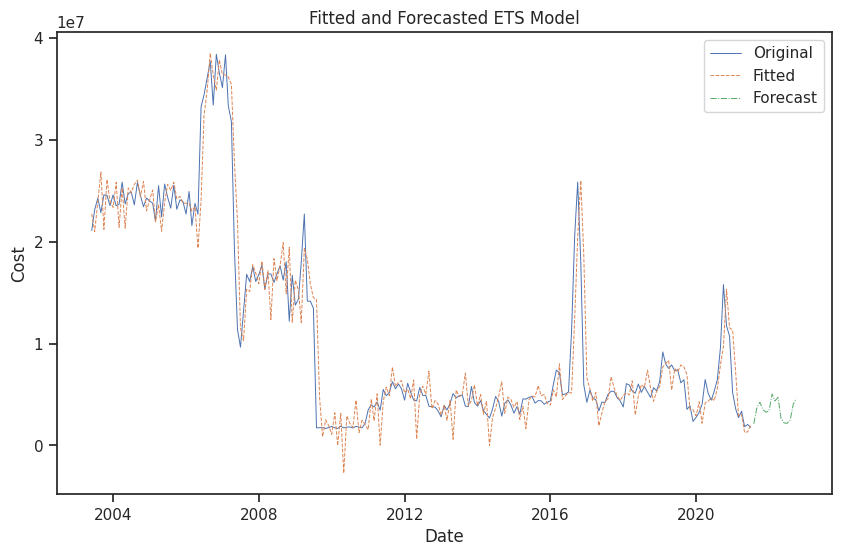

2021-07-31 00:00:00+00:00    2.133954e+06
2021-08-31 00:00:00+00:00    3.685008e+06
2021-09-30 00:00:00+00:00    4.249447e+06
2021-10-31 00:00:00+00:00    3.524834e+06
2021-11-30 00:00:00+00:00    3.263233e+06
2021-12-31 00:00:00+00:00    3.399299e+06
2022-01-31 00:00:00+00:00    5.055553e+06
2022-02-28 00:00:00+00:00    4.379812e+06
2022-03-31 00:00:00+00:00    4.715268e+06
2022-04-30 00:00:00+00:00    2.668790e+06
2022-05-31 00:00:00+00:00    2.217648e+06
2022-06-30 00:00:00+00:00    2.170674e+06
2022-07-31 00:00:00+00:00    2.497011e+06
2022-08-31 00:00:00+00:00    4.048065e+06
2022-09-30 00:00:00+00:00    4.612504e+06
Freq: M, dtype: float64


In [62]:
final_model = ExponentialSmoothing(df_monthly, trend='add', seasonal='add', seasonal_periods=12)
final_fit = final_model.fit()

forecast_steps = 15  # Number of periods to forecast
forecast1 = final_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 6))
plt.plot(df_monthly, label='Original')
plt.plot(final_fit.fittedvalues, label='Fitted', linestyle='--')
plt.plot(forecast1, label='Forecast', linestyle='-.')
plt.title('Fitted and Forecasted ETS Model')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()
plt.show()

# Print the forecasted values
print(forecast1)